---
# **<center><font size="15">Malaria Detection</font></center>**
---

<center>The detection of Malaria utilizing machine vision and deep learning algorithms.</center>

### **<center>Brent A. Thorne</center>**
<center>brentathorne@gmail.com</center>

---

### **<center>Five different human malaria Plasmodium species</center>**
#### <center>and their life stages in thin blood film</center>

<center><img src='https://drive.google.com/uc?export=view&id=1GyrO46EBatwwXPPUIG903sNg_x89Hv7c' width=500px></center>

<center>Source: K. Silamut and CDC.}</center>
 



---
## **Abstract**
---

According to the WHO, Malaria infects 241 million people a year--leading to over 627 thousand deaths each and every year.  In addition to the toll on life, Malaria has wide reaching sociological and economic impact.  To quote T. H. Weller, a Nobel laureate in medicine, “It has long been recognized that a malarious community is an impoverished community.”  Thus, detecting and treating Malaria stands to improve not only human health but the economic health of communities and entire nations[1].

Malaria is a parasitic disease caused by a single-celled microorganism of genius Plasmodium.  The Plasmodium cells are passed into the blood of humans and other animals by mosquito saliva.   Once in the blood, the parasites travel into the liver where they mature and reproduce, then infect red blood cells (RBCs).  The parasites further multiply in the RBCs, periodically breaking out of their host cells to invade fresh RBCs[2].  This cycle continuously amplifies the number of parasites in an infected person.

Malaria exhibits no symptoms during the liver infection stage--only developing non-specific symptoms once around 100,000 parasites per milliliter of blood[2][3].  Typical diagnostic methods include microscopic examination of blood films,   antigen-based rapid diagnostic tests (RDT) and polymerase chain reaction (PCR) to detect Plasmodium DNA. Each method has it’s own limitations and advantages.

Microscopic examination provides information about the extend of the infection however requires slide preparation in a laboratory.  RDTs are easily transported and performed but require commercial manufacturing, vary in lot quality and provide less information than microscopy.  PCRs can definitively identify a pathogen, however require expense equipment, complexity laboratory procedures, and have poor specificity for active infections.  For its balance of availability and diagnostic quality, microscopy remains the gold standard of Malaria diagnosis.

Microscopic examination involves examination of slides, prepared using Giemsa-stained (a nucleic acid stain) films of blood.  A “thick film” allows the technician scan many blood cells at a time and a “thin film” to see individually cells and identify the infecting species. Under typical field laboratory conditions, a microscopist can detect parasites when there are at least 100 parasites per milliliter of blood, which is around the lower range of symptomatic infection[4].  With the advent of inexpensive and high quality imaging hardware there exists an opportunity to improve the detection rate of field technicians by utilizing machine vision and deep learning algorithms. 

##### **See also**: 
* Appendix 0. Resources
* Appendix 1. Capstone Milestone Checklist
* Appendix 2. Final Submission Checklist
* Appendix 3: Core Summary



---
## <b>Objective and Dataset </b>
---
The objective for this project is to build an accurate and efficient machine vision model that can improve the detection rate for a technician.  The model is intended to identify whether or not the red blood cell in an image is infected with Malaria.  The dataset set consists of 8-bit/color RGB images of varying width and height.  The dataset is provided as a compressed zip file and the unzipped directory structure and paths split the dataset between test and train, with subdirectories for parasitize and uninfected images.

Directory Tree for Image Files:
```
cell_images/
├── test
│   ├── parasitized
│   └── uninfected
└── train
    ├── parasitized
    └── uninfected
```

There are a total of 24,958 train and 2,600 test images taken from microscopic images ("thin-film" preparation assumed). These images are of the following categories:


* **Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
* **Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>

---
## <b>Approach</b>
---
A CNN model was chosen based on the nature of the dataset--color images.   Consideration was given to how additional training data could be used to build an additive model and how the addition of images might cause an imbalance in the loss function. This was deemed to be out of scope for this project.  Transfer learning was utilized to save and compare  model architectures which also include the pre-trained VGG16 network.

The model was hosted on the Google Cloud Platform, Colab runtime, which had limitations to the amount of memory available and file access times. Thus, consideration was given to the complexity of the model and file access.  Reducing complexety reduced memory allocation and reducing file accesses greatly reduced execution time. 

The images were resized and scaled to adhere model input architecture.  Care was take to resize images once and save off the results as a single file using the pickle library.  Color Space transformations will be evaluated as deem required however there is a motivation to avoid any needless preprocessing that might be learned by the model.

Two methods were explored to remedy training set inbalance--random dropping of inbalanced data and augmentation of positive-negative images thru mirroring and random flip.  Each method had staged advantages which could be areas for further research. 

We also considered how a model might be transfered to low-compute-capablity edge-computing devices such as smart-phones.  To this end, we tuned select models for local hosting by limiting batch size and layer complexity.  This became an area of deep interest and a motivation to refine model efficiency and reduce complexity.  Although out of scope for this project some care was taken to develop a model and workflow that could be used by the field technician.  

We understand that due to the nature of slide preparation that a number of cells will be analysed to make a diagnosis.  Thus model accuracy above a certain threshold isn't required for this particalur model.  Any such diagnositic threshold is considered out-of-scope for this project. 

We shall tune models based on their Test-Accuracy against a validation dataset.  We shall evaluate model performance only once and against a full test dataset.  Model performance will be evaluated based on precision, recall, and f1-score, as well as, miniminzing the false-negatives (Missclassified infected cells).

---
## **Methodology**
---
Our approach to the problem was mulitstaged:
* Stage 1: Exploratory Data Analytics
  * Load dataset
  * Image resizing (done at file injest)
  * Visualize dataset
  * Data Caching

* Stage 2: Data Preprocessing
  * Color Space Conversion
  * Gaussian Blurring
  * Data Spliting
  * Balancing dataset
  * One Hot Encoding

* Stage 3: Model Building
  * Define Architecture
  * Fit Model
  * Evaluate Model
  * Model Caching

* Stage 4:
  * Performance Evaluation
  * Model Comparison
  * Summary Report

* Stage 5:
  * Conclusions
  * Recommendations
  * Risk Assement
  * Understanding Challenges
  * Final Design Proposal

General Notes:
* Code abstraciton is used to leverage code resuability and reduce errors.
* Function definitions appear in the code as they are used for the first time.
* Global scoped varibles are used when needed. 
* See: Appendix 1. Capstone Milestone Checklist, for a section index of each milestone.  This is provided as an aid to the reader.



---
## **Key Questions**
---

* What is the nature of the image set provided?
* Can the images be enhanced to improve classification?
* Can an efficient and accurate machine vision model be built?
* Can we developed a notebook to ease model exploration--saving and retrieving previous models?
* How might our model integrate into a larger pipeline such as a Clinical Decision Support System (CDSS)?


---
# **System Setup**
---


<i>"I think we drink virgin blood because it sounds cool."

--Deacon, What We Do in the Shadows </i>

---
### <b>Loading libraries</b>
---

In [1]:
import os
import gc
import re
import sys
import cv2

import pickle
import zipfile
import logging

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import tensorflow as tf

import matplotlib.pyplot as plt

from io import BytesIO
from datetime import datetime
from google.colab import drive
from PIL import Image, ImageOps

from tensorflow.python.client import device_lib

---
### <b>System Configuration</b>
---

In [2]:
# Define Debug Assert
def assertEnd():
  assert(False), ('\n' +
                'This is the end, beautiful friend\n' +
                'This is the end, my only friend\n' +
                'The end of our elaborate plans\n'+
                'The end of everything that stands\n--The Doors') # 

In [3]:
# Mount the Drive
path=[]
LOCAL = False
if LOCAL:
    path = './content/'
else:    
    drive.mount('/content/drive')
    path='/content/drive/MyDrive/Colab Notebooks/content/'

Mounted at /content/drive


In [4]:

# Setup Logging to Record results
#
# We're not going to use this at this time, however
# we do want to establish a methodology
# that might be applied in a production environment.

# create logger for this subject matter
logger = logging.getLogger('Malaria_Detection')
logger.setLevel(logging.DEBUG)

# create file handler which logs even debug messages
logfilename = f'logfile{datetime.now().strftime("%Y%m%d_%X")}.txt'
fh = logging.FileHandler(f'{path}/{logfilename}')
fh.setLevel(logging.DEBUG)

# create formatter
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# add formatter to fh
fh.setFormatter(formatter)

# add handler to logger
logger.addHandler(fh)

# add stream handler
#sh = logging.StreamHandler(sys.stdout)
#logger.addHandler(sh)


In [5]:
logger.debug('='*60)
logger.debug(f'\tLog File:\t{logfilename}')
logger.debug('='*60)
logger.info('This is level: INFO')
logger.warning('This is level: WARNING')
logger.error('This is level: ERROR')

DEBUG:Malaria_Detection:============================================================
DEBUG:Malaria_Detection:	Log File:	logfile20230415_16:34:02.txt
DEBUG:Malaria_Detection:============================================================
INFO:Malaria_Detection:This is level: INFO
ERROR:Malaria_Detection:This is level: ERROR


In [6]:
print('This ought to be seen in the logs too.') # nope this broken
# it's a bit of a loop to print logger messages to stdout
# and stdout into logger (let's not do that!)
#logging.shutdown()
#assertEnd()

This ought to be seen in the logs too.


In [7]:
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print(f"Python: {sys.version}")
print(f"Pandas: {pd.__version__}")

# Show GPU info or assert
if len(tf.config.list_physical_devices('GPU')) > 0: 
  g = re.search('physical_device_desc: "(.*)"', str(device_lib.list_local_devices()))
  if g:
    print(f'GPU Info: {g.groups()[0]}')
  else:
    assert(False), 'No GPU info found. TPU not supported.'
else:
  assert(True), 'GPU is NOT AVAILABLE. ;-(' # disabled for testing

Tensor Flow Version: 2.12.0
Keras Version: 2.12.0
Python: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
Pandas: 1.5.3
GPU Info: device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5


---
## <b>Data Loading</b>
---

The dataset was provided as a zip file.  Since Google drive is slow to open files, care is taken to unzip this file only once.  Likelywise, each file must be opened during resizing so the resulting numpy arrays are saved as a single pickle file after processing.  If the pickle file so present, the arrays are loaded directly from the pickle file, avoiding this lengthy processes. 

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [8]:
SIZE = 72
BRATIO = 0.02 # boarder to image width ratio
EQUAL_ASPECT = False

def process_image(image):
  '''
  Process image by streching, filling and scaling. Returns processed image.
  '''
  S = max(image.size)
  
  if not EQUAL_ASPECT: # eg. preserves original aspect... logic made sense at the time. ;-p
    image = ImageOps.pad(image, size=(S,S) )
    image = ImageOps.expand(image, border=int(S*BRATIO), fill='black')
  else:
    image = image.resize((S, S))
    image = ImageOps.expand(image, border=int(S*BRATIO), fill='black')
  
  image = image.resize((SIZE, SIZE))
  #plt.imshow(image)
  #plt.show()
  return image

In [9]:
# Empty list to store the images and labels (0 - uninfected, 1 - parasitized)
train_images = []
train_labels = []
test_images = []
test_labels = []

In [10]:
# check for pickle file then unpack image into memory, resize, and stack
# delete this file to regenerate
PICKLED = None
if os.path.isfile(f'{path}/celldata.pkl'):
  PICKLED = True
else:
  PICKLED = False

target_zip = f'{path}/cell_images.zip'
if not PICKLED:
  # Injest zip
  with zipfile.ZipFile(target_zip) as archive:
      for info in archive.infolist():

          filename = info.filename
          #print(f"Filename: {filename}")
          m = re.search(r'cell_images/(test|train)/(parasitized|uninfected).*png$', filename)
          if m:
              #print(f'{m.group(1)}, {m.group(2)}')

              data = archive.read(filename)
              b = BytesIO(data)
              image = Image.open(b)
              image = process_image(image)
              
              
              #print(len(image))
              name = m.group(1)
              label = 1 if m.group(2) == 'parasitized' else 0
              
              if name == 'test':
                  test_images.append(np.array(image))
                  test_labels.append(label)
              else:
                  train_images.append(np.array(image))
                  train_labels.append(label)
              #assert(False), "FIN."

In [11]:
# This saves lots of time!
# create pickle if not pickled,
# load pickle otherwise
if not PICKLED:  
  # create pickle file so that we don't do this again
  with open(f'{path}/celldata.pkl', 'wb') as db_file:
    pickle.dump(obj={'train_images': np.array(train_images),
                    'train_labels': np.array(train_labels),
                    'test_images': np.array(test_images),
                    'test_labels': np.array(test_labels),
                     'size': SIZE}, file=db_file)
    print('Gherkin created.')
    PICKLED = True
else:
  with open(f'{path}/celldata.pkl', 'rb') as db_file:
    db_pkl = pickle.load(db_file)
    train_images = db_pkl['train_images']
    train_labels = db_pkl['train_labels']
    test_images = db_pkl['test_images']
    test_labels = db_pkl['test_labels']
    SIZE = db_pkl['size']
    print('Gherkin injested.')

Gherkin injested.


In [12]:
# Provide a helper function to reload the data 
def reload_data():
  with open(f'{path}/celldata.pkl', 'rb') as db_file:
    db_pkl = pickle.load(db_file)
    print('Gherkin injested.')
    return (db_pkl['train_images'],
            db_pkl['train_labels'],
            db_pkl['test_images'],
            db_pkl['test_labels'])
    
train_images, train_labels, test_images, test_labels = reload_data()

Gherkin injested.


In [13]:
len(test_images)

2600

---
# <b>EDA</b>
---

Show the shape, counts and datatypes. 

### <b> Check the shape and range of dataset

In [14]:
print(f'Train Images: {train_images.shape}\t Test Images: {test_images.shape}')
print(f'Train Labels: {train_labels.shape}\t\t\t Test Labels: {test_labels.shape}')
print(f'Train Images Value Range: {train_images.min()} to {train_images.max()}\t Type:{train_images.dtype}')

Train Images: (24958, 72, 72, 3)	 Test Images: (2600, 72, 72, 3)
Train Labels: (24958,)			 Test Labels: (2600,)
Train Images Value Range: 0 to 255	 Type:uint8


### <b> Count the number of values in both uninfected and parasitized 

In [15]:
# Try to use value_counts to count the values
def count_labels(labels):
  '''Returns: infected_count, uninfected_count'''
  return labels.sum(), (len(labels) - labels.sum())

print(f'Train: (Infected, Healthy) = {count_labels(train_labels)}')
print(f'Test: (Infected, Healthy) = {count_labels(test_labels)}')

#assertEnd()

Train: (Infected, Healthy) = (12582, 12376)
Test: (Infected, Healthy) = (1300, 1300)


### <b> Plot to check if the data is balanced

Train: (Infected, Healthy) = (12582, 12376)
Test: (Infected, Healthy) = (1300, 1300)


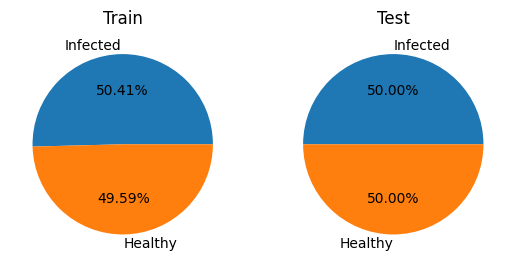

In [16]:
def plot_balance(train_labels, test_labels):
  plt.subplot(1,2,1)
  plt.pie(list(count_labels(train_labels)),
          labels = [ 'Infected', 'Healthy'],
          autopct='%2.2f%%');
  plt.title('Train')

  plt.subplot(1,2,2)
  plt.pie(list(count_labels(test_labels)),
          labels = [ 'Infected', 'Healthy'],
          autopct='%2.2f%%');
  plt.title('Test');

  print(f'Train: (Infected, Healthy) = {count_labels(train_labels)}')
  print(f'Test: (Infected, Healthy) = {count_labels(test_labels)}')

plot_balance(train_labels, test_labels)

### <b> Observations and insights:</b>

Images are of 3 colours of varying pixel widths and height, rescaled to 64x64 (or 72x72 when boarder enabled) pixels.  Training dataset is comprised of 24958 images and the test set of 2600 images.  

Pixels are represented as an 8 bit unsigned integer thus normalizing to a positive float (from 0 to 1) will be required for positive-definates of our model.  

The images have been processed by cropping and masking of individual RBCs.  Based on our background research[5] these images were likely prepared by a SNN (Segmentation Neural Network).

The number of Healthy and Infected images was roughly equal but rebalancing the  training set will be key to loss function performance. 

---
# <b>Balancing the Dataset</b>
---


<i>"be polite, be professional, but have a plan to kill everybody you meet"

--James Norman Mattis, Retired 4-Star General, U.S. Marine Corps</i>

### <b>Validation Split </b>
Before we rebalance we are going to split off a validation set.  We'll use this set to evaluate and tune our model.  Using this method we'll maintain the purity of the test set.  This propablity a bit overkill, dropping worked equally well.



Train: (Infected, Healthy) = (10087, 9881)
Test: (Infected, Healthy) = (2495, 2495)


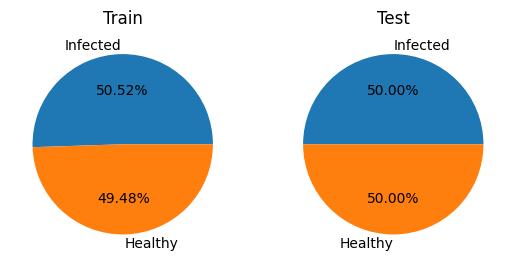

Note: Test refers to Validation here.


In [17]:
from sklearn.model_selection import train_test_split
#train_images, train_labels, test_images, test_labels = reload_data() # for testing
split_ratio = 0.2 # 20%

# Unfortunately split does work the way we wanted it to.
# We want the validation to remain a pure balanced sample.
# It doesn't make any sense to augment the validation test,
# thus we shall only augment the training set.   

# build a list of balanced random indexes
# We made this function return 2*N entries... it made sense at the time.
def balanced_sample(labels, N):
  np.random.seed(42)
  index_set_0 = set()
  index_set_1 = set()

  #N = (6*6)//2
  while ( (len(index_set_0) < N) or (len(index_set_1) < N)):
      index = int(np.random.randint(0, labels.shape[0], 1)) 
      if train_labels[index] == 0:
        if (len(index_set_0) < N):
          index_set_0.add(index)
      else:
        if (len(index_set_1) < N):
          index_set_1.add(index)

  return list(index_set_0) + list(index_set_1)

# now make a sample dataset
index_list = balanced_sample(train_labels, (len(train_labels)* split_ratio)//2)
validation_images = []
validation_labels = []
for index in index_list:
  image = np.array(train_images[index].copy())
  validation_images.append(image)
  validation_labels.append(train_labels[index])

# spank it on the bottom...
# and that's how new data is borne! :D 
validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)

# now drop the validation indexes from the training set
train_labels = np.delete(train_labels, list(index_list),0)
train_images = np.delete(train_images, list(index_list),0)

plot_balance(train_labels, validation_labels)
plt.show()
print('Note: Test refers to Validation here.')

### <b> Rebalance our training set </b>

Two method of rebalancing were tested,
  - randomized augementation with mirrored randomized flip,
  - randomized drop.

We'll drop any test dataset inbalance and augment any train dateset inbalance.

There are 206 sample inbalance between infected and health images.
Let's fix that with a mirror and random flip...
Train: (Infected, Healthy) = (10087, 10087)
Test: (Infected, Healthy) = (2495, 2495)
Note: Test refers to Validation here.


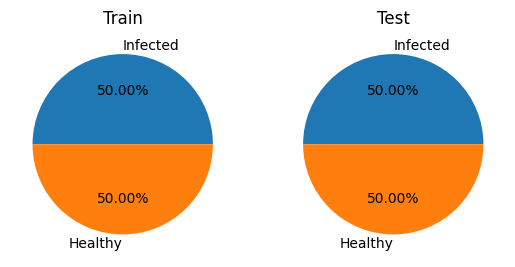

In [18]:
# Method 2-- randomized index with mirrored randomized flip
#train_images, train_labels, test_images, test_labels = reload_data() # for testing

 
# Consider side-effects
#   Is this really better than dropping? We say yes!
#   ... As long as the imbalance is small and
#       in the direction of infected labels
def balance_agument(train_labels):
  # calculate difference
  num1, num0 = count_labels(train_labels) 
  c = num1 - num0 

  # Recall: 1 <=> infected and 0 <==> healthy
  balance = 0
  if (c<0):
    balance = 1

  # build a list of random indexes
  index_list = set()
  if (abs(c)>0):
    print(f'There are {num1-num0} sample inbalance between infected and health images.')
    print("Let's fix that with a mirror and random flip...")
    
    while len(index_list) < abs(c):
      index = int(np.random.randint(0, train_labels.shape[0], 1)) 
      if train_labels[index] == balance:
        index_list.add(index)

  # mirror and flip at random our randomly select images
  new_images = []
  new_labels = []
  for index in index_list:
    # mirror
    image = np.flip(np.array(train_images[index].copy()), axis = 0)
    
    # random flip
    if  bool(np.random.randint(0,2,1)):
      image = np.flip(image, axis = 1)
    
    # spank it on the bottom...
    # and that's how new data is borne! :D 
    new_images.append(image)
    new_labels.append(train_labels[index])
  return new_images, np.array(new_labels)

new_images, new_labels = balance_agument(train_labels)
train_images = np.vstack((train_images, new_images))
train_labels = np.hstack((train_labels, new_labels))

plot_balance(train_labels, validation_labels)
print('Note: Test refers to Validation here.')

In [19]:
# Method 1-- randomized drop
def balance_drop_list(train_labels):
  np.random.seed(42)

  index_list = set()

  # calculate difference
  num1, num0 = count_labels(train_labels)
  c = num1 - num0

  # select whether to drop infected or uninfected image to balance out the data
  balance = 1
  if (c<0):
    balance = 0

  if (abs(c)>0):
    print(f'There are {num1-num0} sample inbalance between infected and health images.')
    print("Let's fix that now...")
    
    while len(index_list) < abs(c):
      index = int(np.random.randint(0, train_labels.shape[0], 1)) 
      if train_labels[index] == balance:
        index_list.add(index)
    
  return index_list

Train: (Infected, Healthy) = (10087, 10087)
Test: (Infected, Healthy) = (1300, 1300)


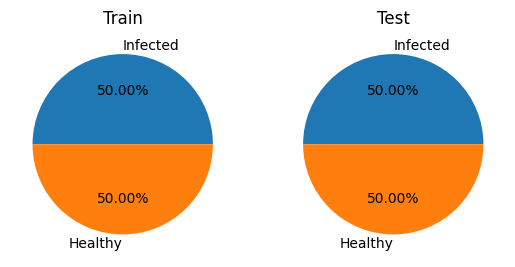

In [20]:
# We've seen Google drive errors on unzipping hence this extra code.
index_list = balance_drop_list(test_labels)
if len(index_list) > 0:
  test_images = np.delete(test_images, list(index_list),0)
  test_labels = np.delete(test_labels, list(index_list),0)
plot_balance(train_labels, test_labels)

### <b> Observations and insights: </b>
We choose to split off a balances validation, then augment the remaining training set.  The training set had 209 more infected images which we augmented with 209 mirrored and randomly flipped healthy images.  We also tested simple dropping but found a slight improvement during fitting with augmentation. It might be aurged that this introduces bias, but we'll leave this as a point of dicussion and debate.  We might show experimental proof one way of the other in the final analysis.

Before we rebalance we choose to split off a balanced validation set.  We'll use this set to evaluate and tune our model.  Using this method we'll maintain the purity of the test set.



---
# <b>Data Visualization</b>
---
Let's visualize the images from the train data, but first let's create a balanced random sample.  We do this to reduce memory usage and to minimize data leakage via the mind of the data scientist.


In [21]:
#train_images, train_labels, test_images, test_labels = reload_data() # for testing

# build a list of balanced random indexes
index_list = balanced_sample(train_labels, (6*6)//2)

# now make a sample dataset (6*6)//2
sample_images = []
sample_labels = []
for index in index_list:
  image = np.array(train_images[index].copy())
  sample_images.append(image)
  sample_labels.append(train_labels[index])

# spank it on the bottom...
# and that's how new data is borne! :D 
sample_images = np.array(sample_images)
sample_labels = np.array(sample_labels)

In [22]:
print(f'Sample Images: {sample_images.shape}\t Test Images: {sample_images.shape}')
print(f'Sample Labels: {sample_labels.shape}\t\t\t Test Labels: {sample_labels.shape}')
print(f'Sample Images Value Range: {sample_images.min()} to {sample_images.max()}\t Type:{sample_images.dtype}')

Sample Images: (36, 72, 72, 3)	 Test Images: (36, 72, 72, 3)
Sample Labels: (36,)			 Test Labels: (36,)
Sample Images Value Range: 0 to 250	 Type:uint8


In [23]:
# this dataset will always be a fixed size
def show_set(images, labels): 
  N = 6
  fig = plt.figure(1, figsize = (12 , 12))

  for n in range(1, N**2+1):
    plt.subplot(N, N, n)
    index = n-1

    if labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(images[index])
    plt.axis('off')

#### <b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

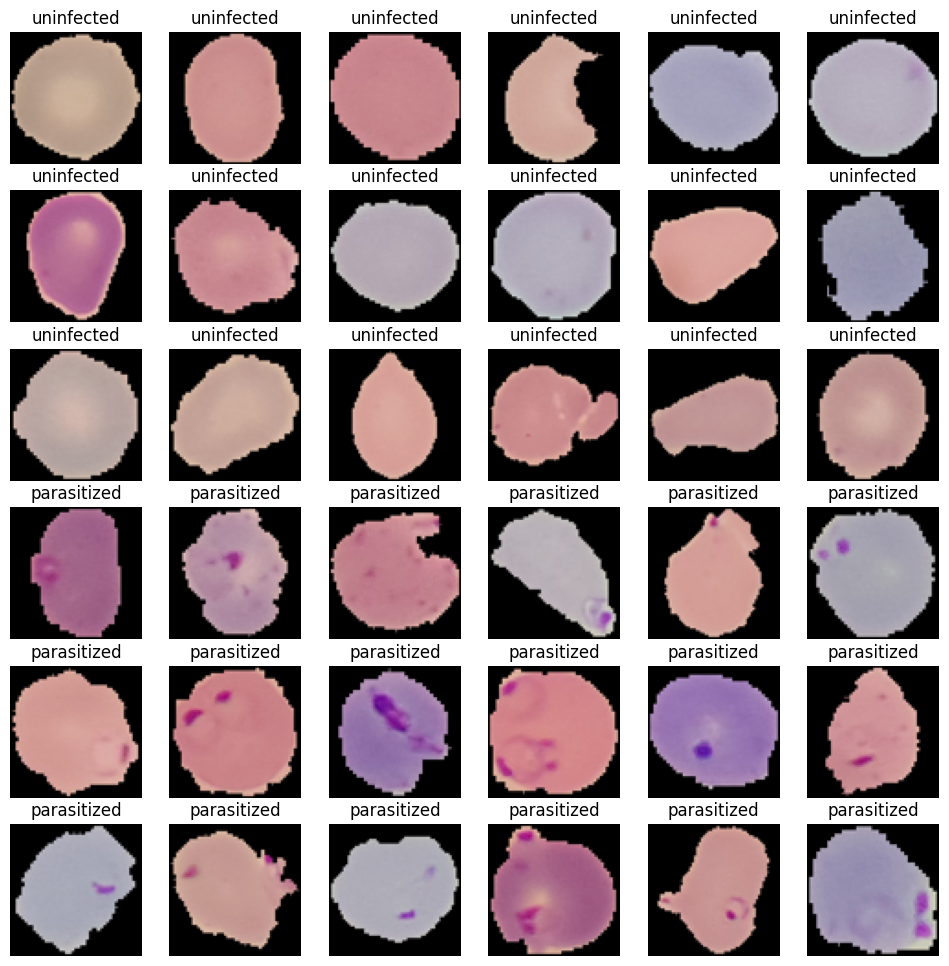

In [24]:
show_set(sample_images, sample_labels)

#### <b> Observations and insights: </b>

Infected cells appear to have a purple spot (Giemsa-stain) assocated with the parasitived plasmid.  Heathly cells are mostly of a single color without much gradient.   We might consider use of hue normalizion.  

As noted previously these images were likely prepared by a SNN (Segmentation Neural Network) which provided cropping and masking of individual RBCs.  The images are tightly cropped.  We might consider adding a slightly larger black background to avoid our model training on the boarder.

---
# <b>Image Conversion
---

In [25]:
def rgb2hsv(images): 
  gfx=[]   # to hold the HSV image array
  for image in images:
    #a = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # why was this wrong in the example?
    a = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) # consider how cv2 treats normalized images
    gfx.append(a)
  return (np.array(gfx)).astype('float32') # hues are angles

def hsv2rgb(images): 
  gfx=[]   # to hold the RGB image array
  for image in images:
    a = cv2.cvtColor(image, cv2.COLOR_HSV2RGB) # consider how cv2 treats normalized images
    gfx.append(a)
  return (np.array(gfx)).astype('float32') 

def blur(images): 
  gfx=[]   # to hold the Blur image array
  for image in images:
    a = cv2.GaussianBlur(image, (5, 5), 0)
    gfx.append(a)
  return np.array(gfx) 

def rgb2norm(images):
  # Don't normalize twice.
  if images.max() > 1:
    return (images/255.0).astype('float32')
  else:
    return images.astype('float32')

### <b> Show mean images for parasitized and uninfected

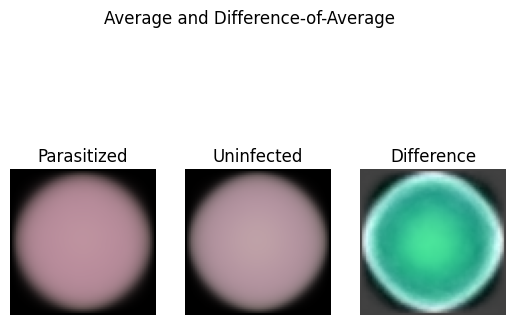

In [26]:
# Recall: for labels a 1 is parasitised and 0 is uninfected
#train_images, train_labels, test_images, test_labels = reload_data() # for testing

# Create a lists to store the data
parasitized_data = []  
uninfected_data = [] 

# use positive-definate norm to find mean images
for img, label in zip(rgb2norm(train_images), rgb2norm(train_labels)):
    if label == 1:
      parasitized_data.append([img])
    else:
      uninfected_data.append([img]) 

# find the mean
find_mean_img = lambda full_mat: np.mean(full_mat, axis = 0)[0]
parasitized_mean = find_mean_img(np.array(parasitized_data))   
uninfected_mean = find_mean_img(np.array(uninfected_data)) 

#diff_mean = np.array([1.0,1.0,1.0]) - (uninfected_mean-parasitized_mean)
# Let's call this a  dynamic mask (We are making this up.)
diff_mean = (uninfected_mean-parasitized_mean)
diff_mean -= diff_mean.min()
diff_mean *= 1/diff_mean.max()

# plot the result
plt.suptitle('Average and Difference-of-Average')
plt.subplot(1,3,1)
plt.imshow(parasitized_mean) 
plt.title('Parasitized')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(uninfected_mean)
plt.title('Uninfected')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(diff_mean)
plt.title('Difference')
plt.axis('off')
plt.show()

In [27]:
# not sure of utility but it certainly looks cool!
# maybe we could use this as a mask...
diff_mean.min(), diff_mean.max() 

(0.0, 1.0)

## <b> Hue Saturation Value (HSV) color space </b>


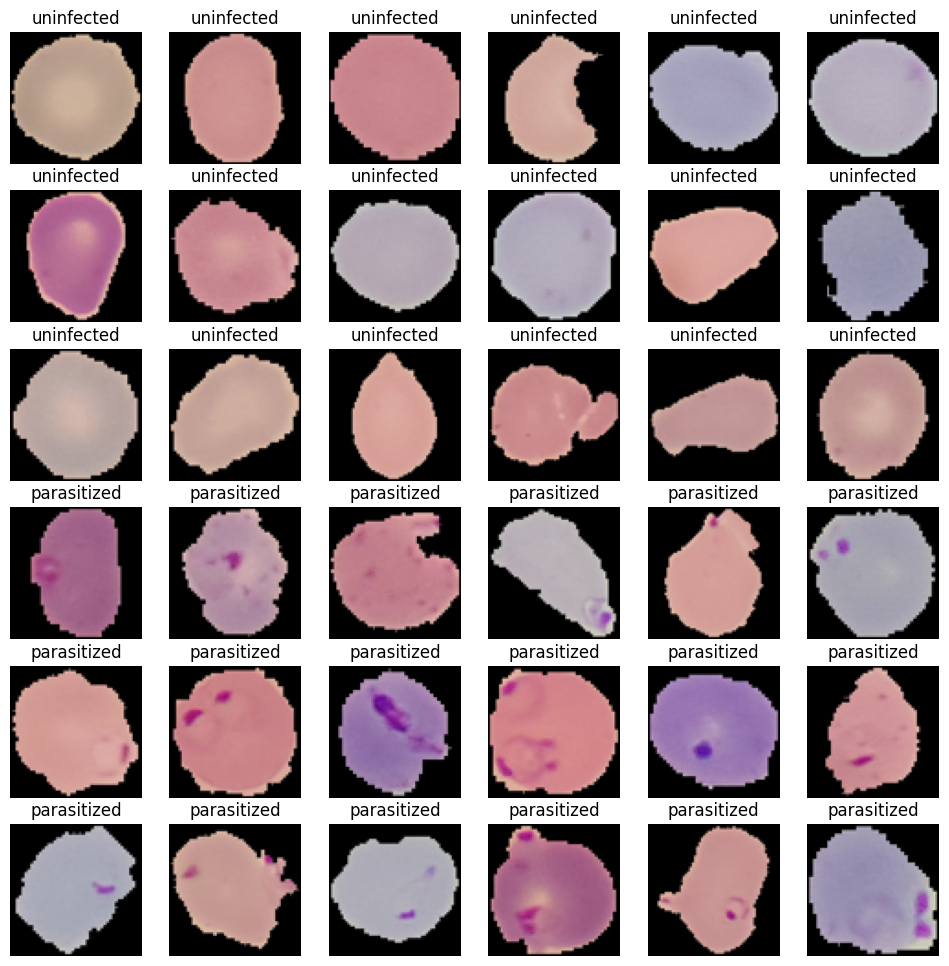

In [28]:
# HSV
sample_images_hsv = rgb2hsv(rgb2norm(sample_images))/360.0

# viewing hsv would be non-sense but 
# we'll do a unity converson back to rgb
show_set(hsv2rgb(sample_images_hsv*360.0), sample_labels)

## <b> Gaussian Blurring

(0.0, 0.8737745)

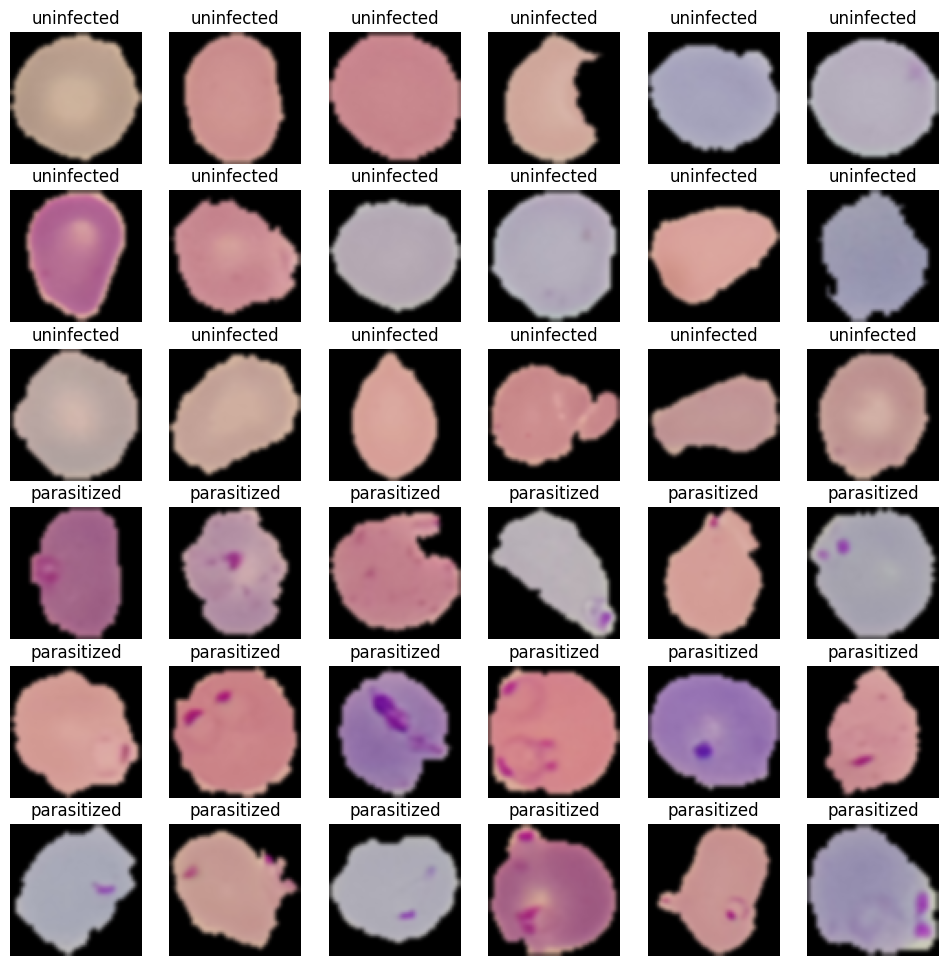

In [29]:
# Blur
sample_images_blur = blur(rgb2norm(sample_images)) 
show_set(sample_images_blur, sample_labels)
sample_images_blur.min(), sample_images_blur.max()

## <b> Dynamic Mask </b>


(0.0, 0.82986844)

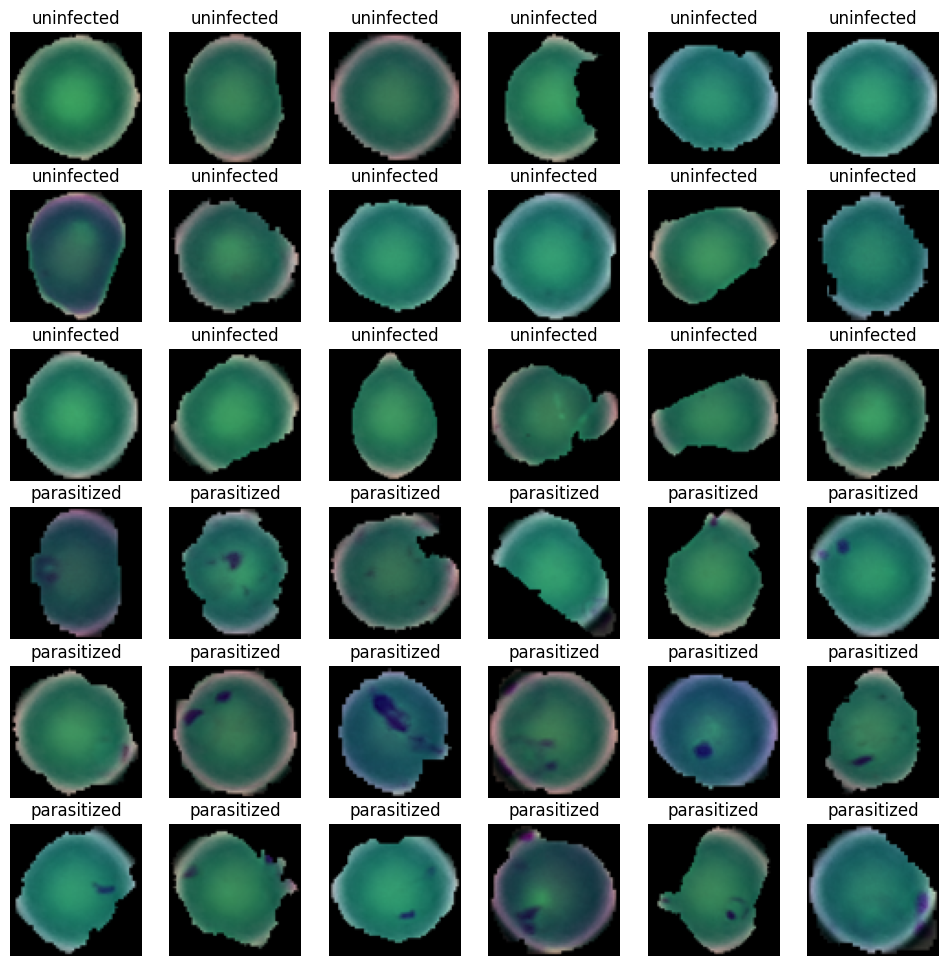

In [30]:
# This could be of some value.
# Those parasites are popping out now.
sample_images_dynamic = rgb2norm(sample_images) * diff_mean 
show_set(sample_images_dynamic, sample_labels)
sample_images_dynamic.min(), sample_images_dynamic.max()

## <b> Standardize Normalization</b>
Here we choose to normalize based on the mean color hue.  We might have choosen to normalize on the mean image.  We'll explore as well if time allows.

Normalization is a method of scaling  to shift and scale (min-max scaling).  
$$X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}}$$

Standardization is a method where values are centered around mean with standard deviation.
$$z=\frac{x-\mu}{\sigma}$$
Where, $\mu$ is the mean of distribution and $\sigma$ is the standard deviation of the distribution.

A range of 0 to 1 is required for positive definiteness. 

(0.0051865764, 1.0)

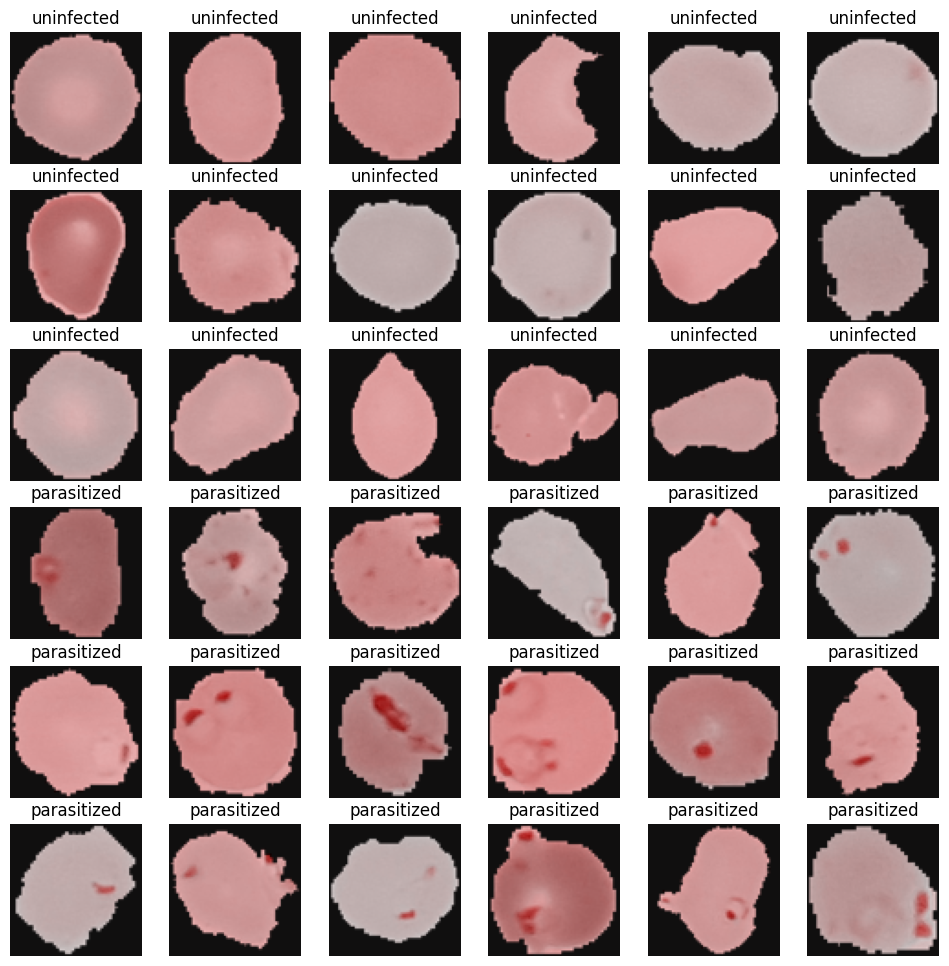

In [31]:
# impliment the formulas above 
def rgb2std(sample_images, hsv=False):
  # Standardization 
  X = rgb2hsv(sample_images)
  mu = np.array([X[:][0].mean(), X[:][1].mean(), X[:][3].mean()])
  sigma = np.array([X[:][0].std(), X[:][1].std(), X[:][3].std()])
  sample_images_std = np.divide((X-mu),sigma)

  # Normalization
  X_max = np.array([sample_images_std[:][0].max(), sample_images_std[:][1].max(), sample_images_std[:][3].max()])
  X_min = np.array([sample_images_std[:][0].min(), sample_images_std[:][1].min(), sample_images_std[:][3].min()])
  X_norm = np.divide(sample_images_std - X_min, X_max - X_min)

  sample_images_std = X_norm/X_norm.max() # fix up rounding error
  if hsv:
    return sample_images_std
  else:
    return hsv2rgb(sample_images_std)

sample_images_std = rgb2std(sample_images)
show_set(sample_images_std, sample_labels)
sample_images_std.min(), sample_images_std.max()

## **2D Wavelet** 

See: Databook[6], Brunton & Kutz

(73, 73)
(73, 73)
(73, 73)


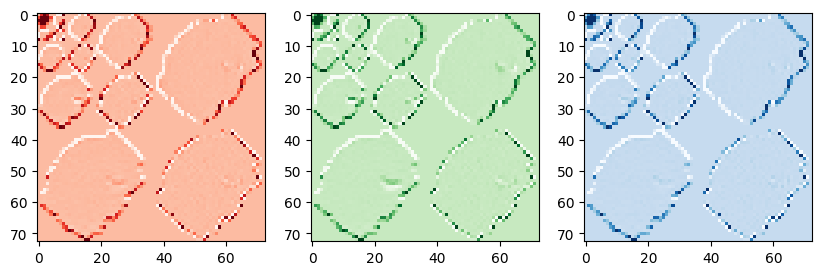

In [32]:
import pywt

A = sample_images[30]

#def image2wavelet(A):
R = np.array([1,0,0])
G = np.array([0,1,0])
B = np.array([0,0,1])
N = []
L = [R,G,B]
C = ['Reds', 'Greens', 'Blues']
#detected_output = cv2.bitwise_and(image, image, mask =  mask) 
#B = np.mean(A, -1); # Convert RGB to grayscale

fig = plt.figure(1, figsize = (10, 10))
for i, l in enumerate(L):
  plt.subplot(1,3,i+1)
  D = A * l
  B = np.mean(D, -1); # Single Color to grayscale

  ## Wavelet decomposition (n-level)
  n = 4
  w = 'db1'
  coeffs = pywt.wavedec2(B,wavelet=w,level=n)

  # normalize each coefficient array
  coeffs[0] /= np.abs(coeffs[0]).max()
  for detail_level in range(n):
      coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

  arr, coeff_slices = pywt.coeffs_to_array(coeffs)
  #plt.imshow(D)
  plt.imshow(arr,cmap=C[i],vmin=-0.25,vmax=0.75)
  N.append(arr)
  print(arr.shape)
plt.show()

1.0

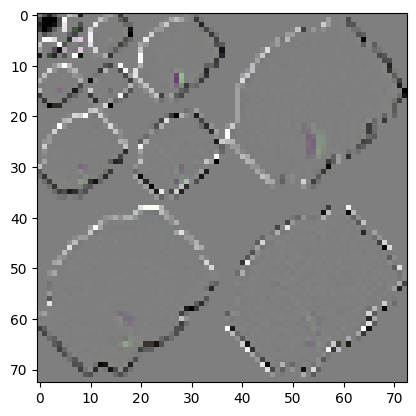

In [33]:
#np.array([N,N,N]).T.shape
M = (1-np.array(N).T)/2
plt.imshow(M)
M.max()

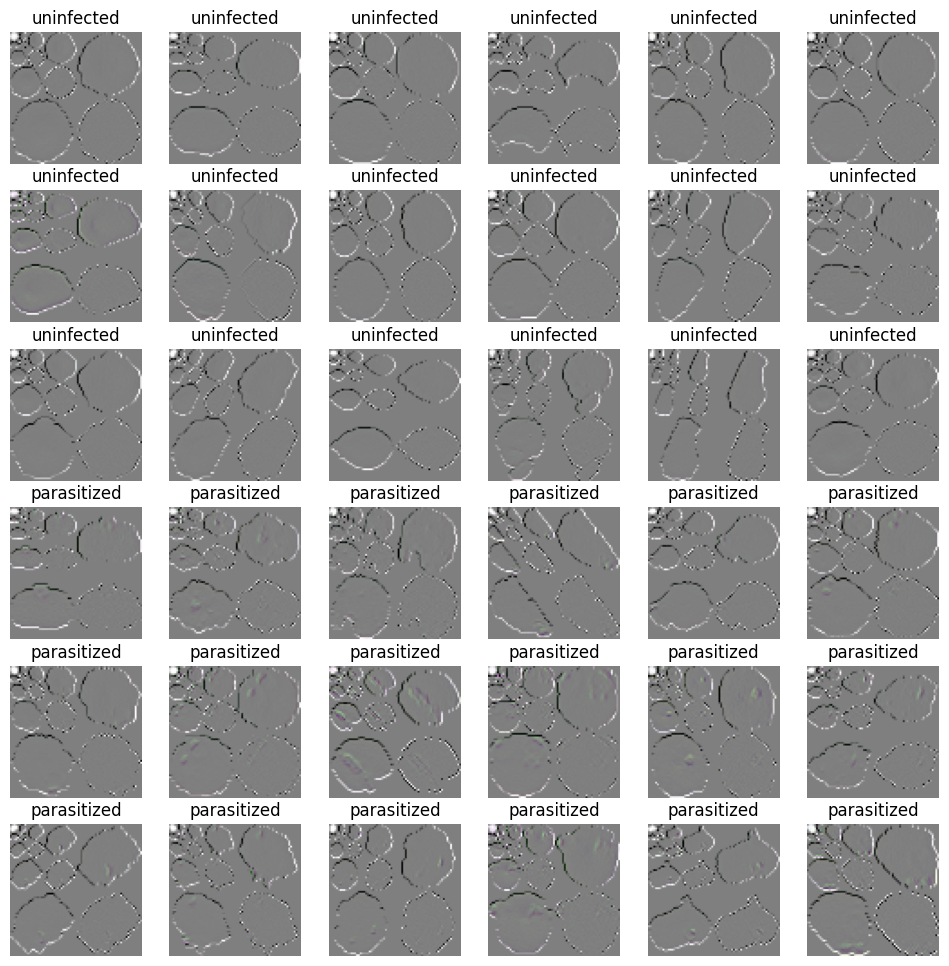

In [34]:
def image2wavelet(A):
  R = np.array([1,0,0])
  G = np.array([0,1,0])
  B = np.array([0,0,1])
  N = []
  L = [R,G,B]

  # ugly and slow
  for i, l in enumerate(L):
    D = A * l
    B = np.mean(D, -1); # Single Color to grayscale

    ## Wavelet decomposition (n-level)
    n = 4
    w = 'db1'
    coeffs = pywt.wavedec2(B,wavelet=w,level=n)

    # normalize each coefficient array
    coeffs[0] /= np.abs(coeffs[0]).max()
    for detail_level in range(n):
        coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

    arr, coeff_slices = pywt.coeffs_to_array(coeffs)
    N.append(arr)
  return (np.array(N).T + 1)/2

def rgb2wavelet(images): 
  gfx=[] 
  for image in images:
    a = image2wavelet(image)
    gfx.append(a)
  return np.array(gfx) 

#plt.imshow(image2wavelet(sample_images[30]))

sample_images_wavelet = rgb2wavelet(sample_images)
show_set(sample_images_wavelet, sample_labels)

## <b>Observations and insights: </b>

As we expected, color space transformations are isometric so they have no effect on the model.  At best they pull out a layer into the image preprocessing stage--at worst introduce bias.  Color space transforms are linear, less machine epsilon error, thus of no predictive value.

We also experimented with hue adjustment but this was of little predictive value thus excluded from further evaluation.  Rounding errors caused minor loss of precision.

Blurring is effectively a low-pass filter as in only low spatial frequencies are allowed to the next layer. Assuming a few big features can be used to classify the images this may be effective. Again this is essentially pulling a layer out of the model.

Wavelet transformation performed well with Batch Normalization but poorly with other models.

In the end we choose to simply resize data with no further preprocessing.  We want our model to be trained with an unadulterated data so that all hidden features are avaiable for hypertuning.  This may aid in additive learning as well.

---
# **Model Building**
---

#### **Prepare Dataset**

Two color space transformation were compared for all models.
Both transformation return a positive definite array that was required for model convergence.  

* Simple rescaling

* Hue standardized and normalized



##### <b> Transform color space </b>
We tested various color space transformation.  For isometeric transforms we didn't expect any difference and indeed it was small.  We did introduce bias using some methods and introduced error due to rounding and machine epsilon.

In short anything we do here could be learned by the model so isn't of much value.  We also considered how our model might be further trained in the field.  If we were to do standardization based on the train set this could not be learned later.

In [35]:
'''
# rgb2wavelet
train_images = rgb2wavelet(train_images)
validation_images = rgb2wavelet(validation_images)
test_images = rgb2wavelet(test_images)
date_notes = 'Training Dataset: RGB Wavelet'
'''

# positive definiteness
train_images = rgb2norm(train_images)
validation_images = rgb2norm(validation_images)
test_images = rgb2norm(test_images)
date_notes = 'Training Dataset: RGB'

'''
# stardardized and normalized (RGB)
train_images = rgb2std(train_images)
validation_images = rgb2std(validation_images)
test_images = rgb2std(test_images)
date_notes = 'Training Dataset: Standarized RGB'

'''

'''
# stardardized and normalized (HSV)
train_images = rgb2std(train_images, hsv=True)
validation_images = rgb2std(validation_images, hsv=True)
test_images = rgb2std(test_images, hsv=True)
date_notes = 'Training Dataset: Standarized Hue RGB'
'''

print(train_images.max())

1.0


##### <b> One Hot Encoding the train and test labels</b>

Consider if this is really needed of not.  We think not depending on how the model output layer is defined.

In [36]:
from tensorflow.keras.utils import to_categorical

# Encode Labels
train_labels = to_categorical(train_labels, num_classes=2) 
validation_labels = to_categorical(validation_labels, num_classes=2) 
test_labels = to_categorical(test_labels, num_classes=2)

##### <b> Select a Dataset  </b>
During Model Tuning we tested out various dataset.  This is here to assure the correct set is used for all models.  In the end the only transform utilied was image rescaling which was done during the color transformation step above.

See: Transform color space

In [37]:
my_train_images, my_validation_images, my_test_images = (train_images, validation_images, test_images)

# we are low on memory (this will help kill bugs too)
del(train_images)
del(validation_images)
del(test_images)

---
### **Model 0** (Base Model)
---
This Base Model was provided in the low code example and used here as a baseline.  We shall use this model for the performance evaluation of our CNN architectures.

#### <b> Importing the required libraries for building and training our Model


In [38]:
from tensorflow.keras import backend

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#### **Clear Model Backend**
The model backend is cleared and garbage collection is perfromed to assure an untrained model is used each time and to reduce memory usage.

In [39]:
def clean_up():
  # Fixing the seed
  np.random.seed(42)

  import random
  random.seed(42)
  tf.random.set_seed(42)

  # Clean start
  backend.clear_session()
  gc.collect()

#### <b> Building the model

In [40]:
clean_up() # clear backend and do garbage collection

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (SIZE, SIZE, 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 72, 72, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 36, 36, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 18, 18, 32)        0

#### <b> Compiling the model

In [41]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#### <b> Using Callbacks 

In [42]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

#### <b> Fit and train our Model

In [43]:
# "Pandemic II Theme Song" by Dark Realm Studios
import IPython
IPython.display.Audio(f'{path}/PandemicII.mp3', autoplay=True)

Output hidden; open in https://colab.research.google.com to view.

In [44]:
def load_pickled_model(model_path):
  '''
  load_pickled_model(), takes model_path as input returns model, history, notes
  '''
  history = []
  model_history_path = model_path + '/history.pkl'

  # Note: Delete models directory to rebuild.
  if (os.path.exists(model_path) & os.path.isfile(model_history_path)): 
    model = load_model(model_path)
    with open(model_history_path, 'rb') as db_file:
      #history = pickle.load(db_file)
      db_pkl = pickle.load(db_file)
      history = db_pkl['history']
      notes = db_pkl['notes']
      print('Gherkin injested.')
  else:
    assert(False), 'Error Loading Model.'
  return model, history, notes

def fit_and_pickle(model, model_path, my_train_images, train_labels, callbacks, notes, forcefit=False):
  '''
    retrives saved model if file present, forcefit=True overrides saved model
    returns: model, history
  '''
  history = []
  model_history_path = model_path + '/history.pkl'

  # Note: Delete models directory to rebuild.
  if (os.path.exists(model_path) & os.path.isfile(model_history_path)) & forcefit!=True: 
    model = load_model(model_path)
    with open(model_history_path, 'rb') as db_file:
      #history = pickle.load(db_file)
      db_pkl = pickle.load(db_file)
      history = db_pkl['history']
      notes = db_pkl['notes']
      print('Gherkin injested.')
  else:
    history = model.fit(my_train_images, 
                      train_labels,
                      batch_size = 32,
                      callbacks = callbacks,
                      validation_data=(my_validation_images, validation_labels),
                      epochs = 20,
                      verbose = 1)
    history = history.history # history, history, history... history
    model.save(model_path)
    with open(model_history_path, 'wb') as db_file:
      #pickle.dump(history, file = db_file)
      pickle.dump(obj={'history':history,
                    'notes':notes}, file=db_file)    
      print('Gherkin created.')
  return model, history

In [45]:
# See how helpful we have become...
help(load_pickled_model)
help(fit_and_pickle)

Help on function load_pickled_model in module __main__:

load_pickled_model(model_path)
    load_pickled_model(), takes model_path as input returns model, history, notes

Help on function fit_and_pickle in module __main__:

fit_and_pickle(model, model_path, my_train_images, train_labels, callbacks, notes, forcefit=False)
    retrives saved model if file present, forcefit=True overrides saved model
    returns: model, history



In [46]:
# Fit the model
notes = f"Model 0: Three Convolution Layers with Dropout, {date_notes}"
model_path = path + 'models/'+ 'model_0'
model, history = fit_and_pickle(model, model_path,my_train_images, train_labels, callbacks, notes)

Gherkin injested.


In [47]:
def plot_accuracy(history):
    N = len(history["accuracy"])
    plt.figure(figsize = (7, 7))
    plt.plot(np.arange(0, N), history["accuracy"], label = "train_accuracy", ls = '--')
    plt.plot(np.arange(0, N), history["val_accuracy"], label = "val_accuracy", ls = '--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

#### <b> Plot the train and validation curves

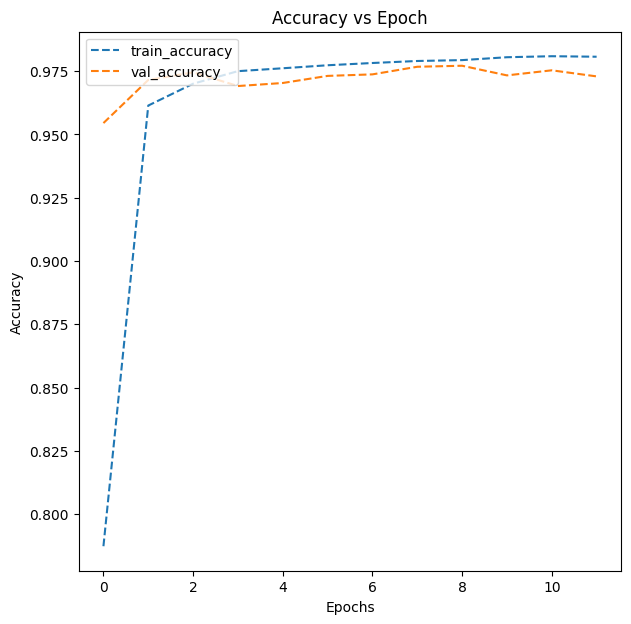

In [48]:
plot_accuracy(history)

#### <b> Evaluating the model using <font color=blue>validation</font> data. </b>
Here we use the validation split we need to evaluate the model.  We've leave plotting the confustion matrix for the final evaluation so that we don't leak data out our ears.

In [49]:
# be careful of which dataset we are using
accuracy = model.evaluate(my_validation_images, validation_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', round(accuracy[1],2))

156/156 [==============================] - 7s 5ms/step - loss: 0.0798 - accuracy: 0.9729

 Test_Accuracy:- 0.97


#### **Show Classifition Report and Plot Confusion Matrix**

See: Model Evaluation for a summary of all confusion matrices.

We purposely don't show them here to avoid data leakage.

In [50]:
def plot_confusion_matrix(model, images):
  pred = model.predict(images)  
  pred = np.argmax(pred, axis = 1) 
  y_true = np.argmax(test_labels, axis = 1)

  # Printing the classification report
  print(classification_report(y_true, pred, digits=4))

  # Plotting the heatmap using confusion matrix
  cm = confusion_matrix(y_true, pred)
  plt.figure(figsize = (8, 5))
  sns.heatmap(cm, annot = True,  fmt = '.0f', 
              xticklabels = ['Uninfected', 'Parasitized'],
              yticklabels = ['Uninfected', 'Parasitized'])
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

In [51]:
# be careful of which dataset we are using... 
# it must be normalized in same manner as training set

# Don't peek yet!
#plot_confusion_matrix(model, my_test_images)

####<b>Observations and insights:</b>

We tested this model using the origin resized images along with hue-norm, hsv and blur images.  The Origin, Hue-Normalized and Blur images preformed equally as well, with 98% scores across the board for precision, recall, and f1-score.  The HSV converted images preformed almost as well with scores of 97% across the board.  This is indeed what we might expect for the homomorphic or isomorphic vector spaces.  We might consider if the HSV transform has precision loss during type-casting angle conversion due to machine epsilon. 

That went suprisingly well!  This will be a hard model to beat!  Admittedly we borrowed this model from the low-code example.  EDA and model tuning aided in model refinement.  With balanced dataset the loss funciton performed better (correctly) in all models.  

Things to consider:
Adding more layers will likely result in overfitting. Thus, we might focus on reducing complexity to impove speed or improve training through augmented image sets. We might consider normalizing image hue based on the averge hue value.  Consider non-ismorphic transformations... are these of metric value? Consider image preprocessing as model layer... which layers can we move to preprocessing?


---
### <b> Model 1 (More layers)</b>
---
Try improving model performance by adding layers.  Consider altering the activation functions. (See: Model 2 for comparision activation functions.) 

#### <b> Building the Model

In [52]:
clean_up() # clear backend and do garbage collection

model = Sequential()
model.add(Input(shape = (SIZE, SIZE, 3))) # let's be a bit verbose
model.add(Conv2D(filters = 16, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.1))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))
model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 72, 72, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 36, 36, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 18, 18, 32)        0

#### <b> Compiling the model

In [53]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#### <b> Using Callbacks

In [54]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

#### <b> Fit and Train the model

In [55]:
notes = f"Model 1: Four Convolution Layers with Dropout, {date_notes}"
model_path = path + 'models/'+ 'model_1'
model, history = fit_and_pickle(model, model_path,my_train_images, train_labels, callbacks, notes)

Gherkin injested.


#### <b> Plotting the train and the validation curves

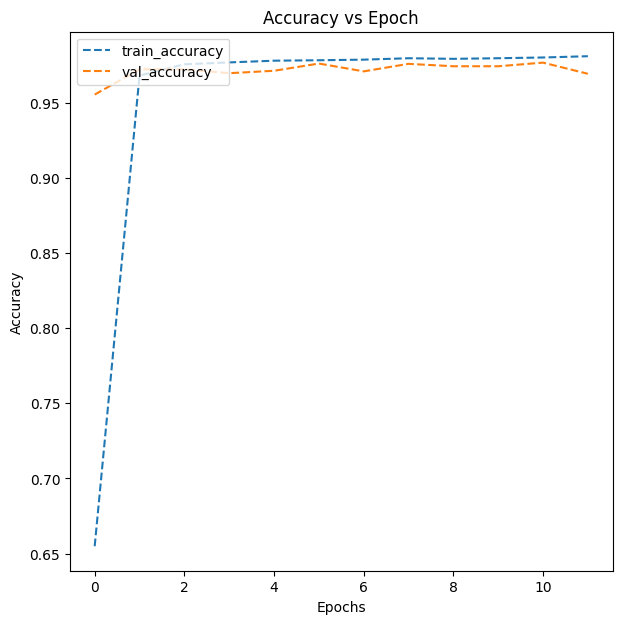

In [56]:
plot_accuracy(history)

#### <b> Evaluating the model using <font color=blue>validation</font> data. </b>

In [57]:
accuracy = model.evaluate(my_validation_images, validation_labels, verbose = 1)
print('\n', f'Test_Accuracy:- {round(accuracy[1],2)}')

156/156 [==============================] - 1s 6ms/step - loss: 0.0948 - accuracy: 0.9691

 Test_Accuracy:- 0.97


#### **Show Classifition Report and Plot Confusion Matrix**

See: Model Evaluation for a summary of all confusion matrices.

We purposely don't show them here to avoid data leakage.

In [58]:
# No peeking!
#plot_confusion_matrix(model, my_test_images)

#### **Observations and insights**

This model appears to perform slightly better with the origin data than Model 0.  This model quickly converged to the training accuracy.  This might indicate overfitting.

---
### **Model 2 (Batch Normalization)**
---

Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.


In [59]:
from tensorflow.keras.layers import BatchNormalization, LeakyReLU, ReLU

#### <b> Building the Model

In [60]:
clean_up() # clear backend and do garbage collection
use_relu = False

model = Sequential()
model.add(Input(shape = (SIZE, SIZE, 3))) # let's be a bit verbose
model.add(BatchNormalization()) # reparametrizing... in case we didn't already (we did)
model.add(Conv2D(filters = 16, kernel_size = 2, padding = "same"))
model.add(ReLU()) if use_relu else model.add(LeakyReLU(alpha=0.2))

model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model.add(ReLU()) if use_relu else model.add(LeakyReLU(alpha=0.2))

model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model.add(ReLU()) if use_relu else model.add(LeakyReLU(alpha=0.2))

model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512))
model.add(ReLU()) if use_relu else model.add(LeakyReLU(alpha=0.1))
  
model.add(Dropout(0.4))
model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 72, 72, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 72, 72, 16)        208       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 72, 72, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 36, 36, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 32)        2

#### <b>Compiling the model

In [61]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#### <b>  Using callbacks

In [62]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

#### <b>  Fit and train the model

In [63]:
notes = f"Model 2: Three Convolution Layers with Dropout and first-layer batch normilization, {date_notes}"
model_path = path + 'models/'+ 'model_2'
model, history = fit_and_pickle(model, model_path,my_train_images, train_labels, callbacks, notes)

Gherkin injested.


#### <b> Plotting the train and validation accuracy

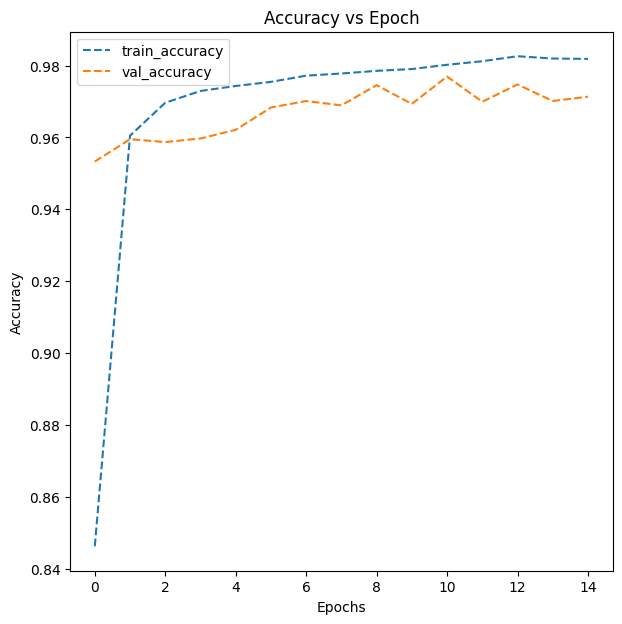

In [64]:
plot_accuracy(history)

#### <b> Evaluating the model using <font color=blue>validation</font> data. </b>

In [65]:
accuracy = model.evaluate(my_validation_images, validation_labels, verbose = 1)
print('\n', f'Test_Accuracy:- {round(accuracy[1],2)}')

156/156 [==============================] - 1s 6ms/step - loss: 0.0985 - accuracy: 0.9713

 Test_Accuracy:- 0.97


#### **Observations and insights:**

This model with ReLU performed slightly better than the base model trained on the RGB dataset.  LeakyReLU performed slightly less well.

#### **Show Classifition Report and Plot Confusion Matrix**

See: Model Evaluation for a summary of all confusion matrices.

We purposely don't show them here to avoid data leakage.

In [66]:
# Don't peek yet!
#plot_confusion_matrix(model, my_test_images)

---
### <b>Model 3 (Data Augmentation) </b>
---

Can we improve the model with Image Data Augmentation?

References for image data augmentation:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)

Here we shall use the training dataset to augment.  We should consider using the original data files here, however in the interest of breivity and liberty simply use a 3rd of training set to create augmented value. 

#### **Data Augmentation**

#### <b>Visualize Augmented images

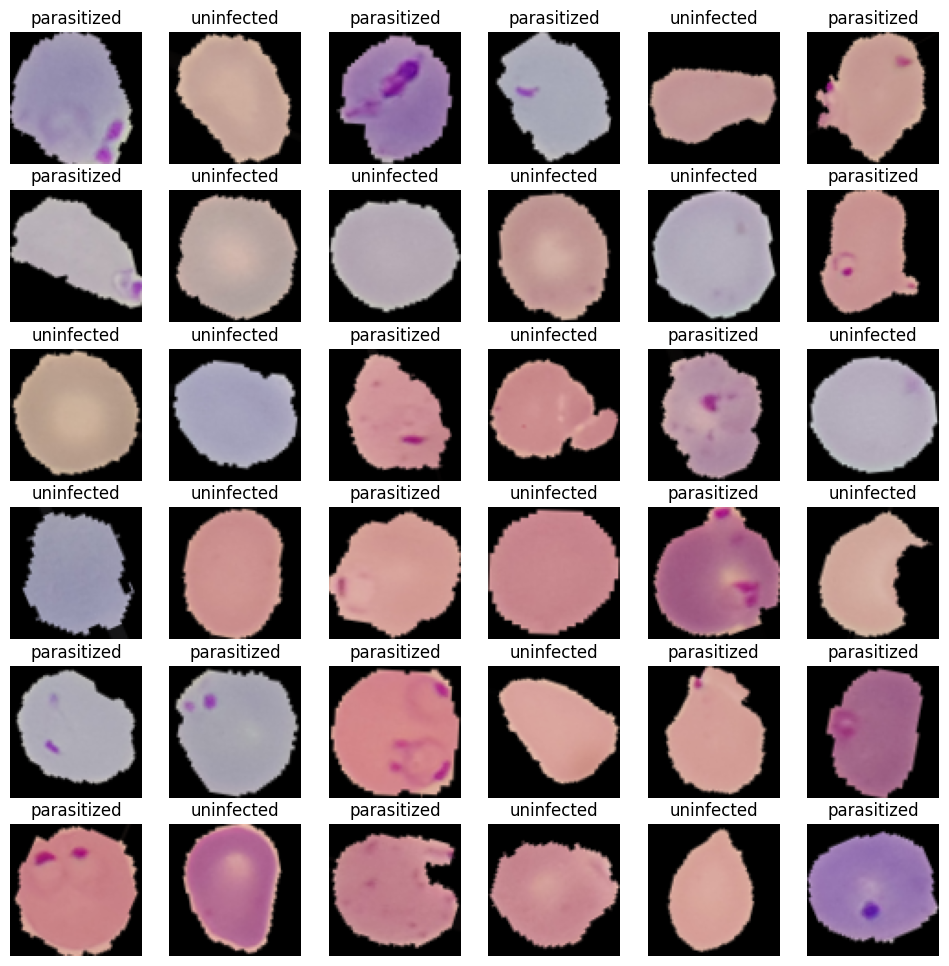

In [67]:
# Let's play with our sample to find a good balance
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(  
    horizontal_flip = True, # base
    zoom_range = 0.03,      # base
    rotation_range = 30)    # base

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = sample_images, y = sample_labels, batch_size = 64, seed = 42, shuffle = True)

# Use the Generator and Show our sample
aug_images, aug_labels = next(train_generator)
show_set(rgb2norm(aug_images), rgb2norm(aug_labels) )

#### **Generate an Augmented Dataset**
Note: This augmentation is invalid for our 2D wavlet dataset.  For that dataset we must augment before transforming to the frequency domain. Colab will run out of memory with anymore than 1/2 the train dataset so that's out max value for now.

In [68]:
#my_train_images, my_validation_images, my_test_images
print(my_train_images.shape, train_labels.shape)

# Prepare the augmented data
batch_size = int(train_labels.shape[0]*1/2) # we want mostly pure images... or do we?
gen1 = train_datagen.flow(x = my_train_images, y = train_labels, batch_size = batch_size, seed = 42, shuffle = True)
new_images, new_labels = next(gen1)
#new_labels = to_categorical(new_labels, num_classes=2) 

# stack'em
#train_images = np.vstack((train_images, new_images))
#train_labels = np.vstack((train_labels, new_labels))

print(new_images.shape, new_labels.shape)

(20174, 72, 72, 3) (20174, 2)
(10087, 72, 72, 3) (10087, 2)


In [69]:
#check balance and drop
def drop2balance(new_images, new_labels):
  np.random.seed(42)

  # calculate difference
  c = new_labels[:,0].sum() - new_labels[:,1].sum()

  # select whether to drop infected or uninfected image to balance out the data
  balance = 1
  if (c<0):
    balance = 0

  if (abs(c)>0):
    print(f'There are {c} sample inbalance between infected and health images.')
    print("Let's fix that now...")
    index_list = set()
    while len(index_list) < abs(c):
      index = int(np.random.randint(0, new_labels.shape[0], 1)) 
      if new_labels[index,0] == balance:
        index_list.add(index)
    return (np.delete(new_images, list(index_list),0), np.delete(new_labels, list(index_list),0))

new_images, new_labels = drop2balance(new_images, new_labels)
print(new_labels[:,0].sum()-new_labels[:,1].sum())
print(new_images.shape, new_labels.shape)

There are -47.0 sample inbalance between infected and health images.
Let's fix that now...
0.0
(10040, 72, 72, 3) (10040, 2)


#### **Observations and insights:**

We found that ImageDataGenerator() doesn't provide a balanced data set. We dropped images to balance the generated dataset.  Consider using featurewise_std_normalization and samplewise_std_normalization, if time allows.

#### <b> Prepare the data for the model </b>

In [70]:
# we do this for housekeeping purposes, but it nolonger needed
#my_train_images, my_validation_images, my_test_images = (
#    train_images, validation_images, test_images)

#### <b>Building the Model </b>
We'll reuse the Model 2 but since we are training it differently we shall reproduce the arch again.

In [71]:
clean_up() # clear backend and do garbage collection

model = Sequential()
model.add(Input(shape = (SIZE, SIZE, 3))) # let's be a bit verbose
model.add(BatchNormalization()) # reparametrizing... in case we didn't already (we did)

model.add(Conv2D(filters = 16, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 72, 72, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 72, 72, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 36, 36, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0

#### <b> Compile and Callbacks

In [72]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

#### <b> Fit and Train the model

In [73]:
notes = f"Model 3: Three Convolution Layers with Dropout and first-layer batch normilization, {date_notes} (Augmented)"
model_path = path + 'models/'+ 'model_3'

model, history = fit_and_pickle(model, model_path,
                                np.vstack((my_train_images, new_images)),
                                np.vstack((train_labels, new_labels)),
                                callbacks, notes)

Gherkin injested.


#### <b> Plotting the train and the validation curves

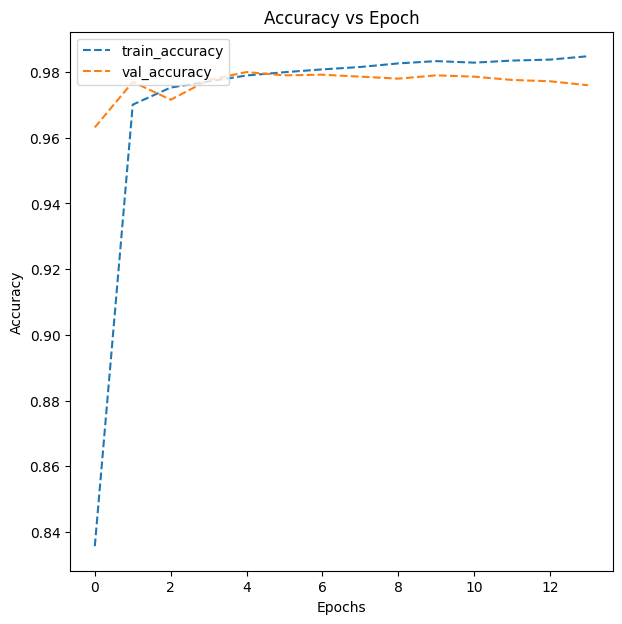

In [74]:
plot_accuracy(history)

#### <b> Evaluating the model using <font color=blue>validation</font> data. </b>

In [75]:
accuracy = model.evaluate(my_validation_images, validation_labels, verbose = 1)
print('\n', f'Test_Accuracy:- {round(accuracy[1],2)}')

156/156 [==============================] - 1s 4ms/step - loss: 0.0664 - accuracy: 0.9760

 Test_Accuracy:- 0.98


#### **Show Classifition Report and Plot Confusion Matrix**

See: Model Evaluation for a summary of all confusion matrices.

We purposely don't show them here to avoid data leakage.

In [76]:
# Don't peek yet!
#plot_confusion_matrix(model, my_test_images)

#### **Observations and insights:**

We found that ImageDataGenerator() doesn't provide a balanced data set.  We dropped images to balance the generated dataset.  We also found that too many augmented images resulted in overfitting.  

---
### **Model 4 (VGG16, using a pre-trained model)**
---

Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [77]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

clean_up() # clear backend and do garbage collection
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (SIZE, SIZE, 3))
vgg.summary()

# Select our tranfer layer
transfer_layer = vgg.get_layer('block3_pool')
vgg.trainable = False  

# Build our classifier up (we'll use same as in the previous models)
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model
x = BatchNormalization()(x)

x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Flatten()(x)

x = Dense(512, activation = 'relu')(x)
x = Dropout(0.4)(x)
pred = Dense(2, activation = 'softmax')(x)
model = Model(vgg.input, pred) # Initializing the model

model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 72, 72, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 72, 72, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 72, 72, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 36, 36, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 36, 36, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 36, 36, 128)       147584    
                                                              

#### <b>Compiling the model

In [78]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#### <b> Using callbacks

In [79]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

#### <b> Fit and Train the model

In [80]:
notes = f"Model 4: VGG16 Transfered at block3_pool Layer with two dense layers, {date_notes}"
model_path = path + 'models/'+ 'model_4'
model, history = fit_and_pickle(model, model_path,my_train_images, train_labels, callbacks, notes)

Gherkin injested.


#### <b> Plot the train and validation accuracy

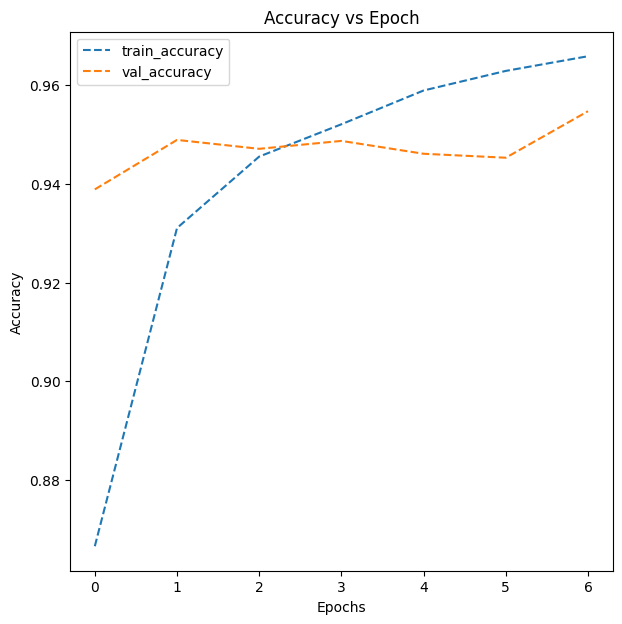

In [81]:
plot_accuracy(history)

#### <b> Evaluating the model using <font color=blue>validation</font> data. </b>

In [82]:
accuracy = model.evaluate(my_validation_images, validation_labels, verbose = 1)
print('\n', f'Test_Accuracy:- {round(accuracy[1],2)}')

156/156 [==============================] - 3s 16ms/step - loss: 0.1721 - accuracy: 0.9547

 Test_Accuracy:- 0.95


#### **Show Classifition Report and Plot Confusion Matrix**

See: Model Evaluation for a summary of all confusion matrices.

We purposely don't show them here to avoid data leakage.

In [83]:
# Don't peek yet!
#plot_confusion_matrix(model, my_test_images)

#### **Observations and insights:**

This model trained in fewer epoches that the other models.  The the validation and train curves indicate that model is well fitted.  We might try to tune the loss metric if time allows. 

## **Model 5: Autoencoder**

We migth consider adding a bottleneck in the middle of this model to create a latent space thur which the signal must pass.  Let's rework this model for as a Autoencoder to show what we've learned up until now.

In [84]:
clean_up() # clear backend and do garbage collection

model = Sequential()
model.add(Input(shape = (SIZE, SIZE, 3))) # let's be a bit verbose
model.add(BatchNormalization()) # reparametrizing... in case we didn't already (we did)
model.add(Conv2D(filters = 16, kernel_size = 2, padding = "same"))
#model.add(Dense(256)) # Lol, this is huge!  We are building a bug eye though.
model.add(Dense(64))
model.add(ReLU())

model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Dense(128)) 
model.add(Conv2D(filters = 16, kernel_size = 2, padding = "same"))
model.add(ReLU())

model.add(MaxPooling2D(pool_size = 8))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 4, kernel_size = 2, padding = "same"))
model.add(Dense(25)) 
model.add(ReLU())

model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 16, kernel_size = 2, padding = "same"))
model.add(Dense(64))
model.add(ReLU())

model.add(Flatten())
model.add(ReLU())
model.add(Dropout(0.1))
model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 72, 72, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 72, 72, 16)        208       
                                                                 
 dense (Dense)               (None, 72, 72, 64)        1088      
                                                                 
 re_lu (ReLU)                (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0

#### <b>Compiling the model

In [85]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#### <b>  Using callbacks

In [86]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

#### <b>  Fit and train the model

In [87]:
notes = f"Model 5: Autoencoder!!, {date_notes}"
model_path = path + 'models/'+ 'model_5'
model, history = fit_and_pickle(model, model_path, my_train_images, train_labels, callbacks, notes, forcefit=False)

Gherkin injested.


#### <b> Plotting the train and validation accuracy

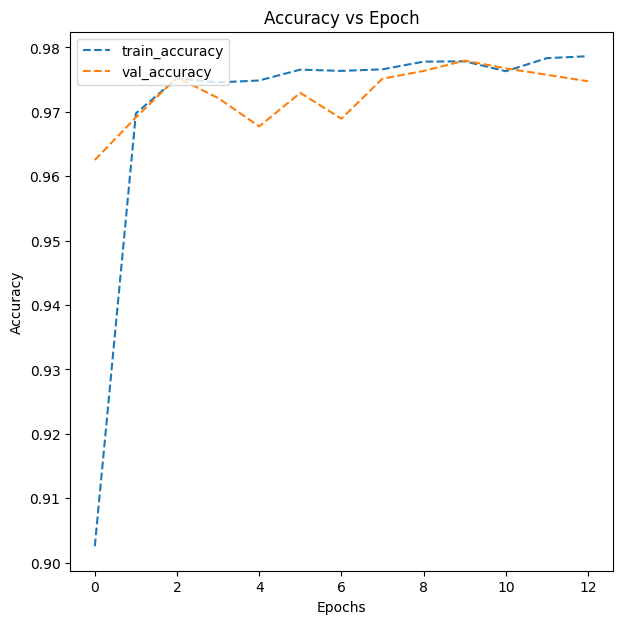

In [88]:
plot_accuracy(history)

#### <b> Evaluating the model using <font color=blue>validation</font> data. </b>

In [89]:
accuracy = model.evaluate(my_validation_images, validation_labels, verbose = 1)
print('\n', f'Test_Accuracy:- {round(accuracy[1],2)}')

156/156 [==============================] - 2s 10ms/step - loss: 0.0684 - accuracy: 0.9747

 Test_Accuracy:- 0.97


#### **Show Classifition Report and Plot Confusion Matrix**

See: Model Evaluation for a summary of all confusion matrices.

We purposely don't show them here to avoid data leakage.

In [90]:
# no Peeking allowed
#plot_confusion_matrix(model, my_test_images)

#### **Observations and insights**

This model has an order of magitude fewer parameters that the previous models.  While this model takes longer to train it preforms superior to the next best model, Model 1.  Fewer parameters mean this model might be better suited for edge computing devices.  This model also improved with augmented data.  This might indicate that the model has the capacity to learn from additive training.  This model performed the best in the area of minimizing false-negatives, beating the next closest model by more that 2.5 times.  

See also: Model comparison (below)

---
# <b>Model comparision</b>
---


In this section we compare all models side-by-side.  All models were trained and evaluated on RGB rescaled datasets.  Hue standardized and 2D Wavelet RGB datasets were also tested for all models.  The performance scores for the alternate datasets were lower for all models, thus excluced for brevity and clarity. 

In [91]:
!pip install keras_flops > /dev/null

In [92]:
from keras_flops import get_flops

# Retrive our models, histories and notes.
model_paths = [path + 'models/'+ f'model_{i}' for i in range(6)]
models = []
histories = []
notes = []
summary = []
for p in model_paths:
  model, history, note = load_pickled_model(p)
  models.append(model)
  histories.append(history)
  notes.append(note)

  flops = get_flops(model, batch_size=1)
  
  #model.summary()
  S = []
  model.summary(print_fn=lambda x: S.append(x))
  S = "\n".join(S)
  #Total params: 
  param_re = re.search(r'Total params: (.*)', S)
  param = 0
  if param_re:
    param = int(param_re.group(1).replace(',',''))

  print(f'{note}: \n\tTotal Parameters: {param/10**6:.03} M-params,\t Flops: {flops/10**9:.03} G-FLOPs')
  summary.append((param/10**6, flops/10**9))


Gherkin injested.


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Model 0: Three Convolution Layers with Dropout, Training Dataset: RGB: 
	Total Parameters: 1.34 M-params,	 Flops: 0.0203 G-FLOPs
Gherkin injested.
Model 1: Four Convolution Layers with Dropout, Training Dataset: RGB: 
	Total Parameters: 0.274 M-params,	 Flops: 0.0114 G-FLOPs
Gherkin injested.
Model 2: Three Convolution Layers with Dropout and first-layer batch normilization, Training Dataset: RGB: 
	Total Parameters: 1.34 M-params,	 Flops: 0.0129 G-FLOPs
Gherkin injested.
Model 3: Three Convolution Layers with Dropout and first-layer batch normilization, Training Dataset: RGB (Augmented): 
	Total Parameters: 1.34 M-params,	 Flops: 0.0129 G-FLOPs
Gherkin injested.
Model 4: VGG16 Transfered at block3_pool Layer with two dense layers, Training Dataset: RGB: 
	Total Parameters: 12.7 M-params,	 Flops: 1.95 G-FLOPs
Gherkin injested.
Model 5: Autoencoder!!, Training Dataset: RGB: 
	Total Parameters: 0.0214 M-params,	 Flops: 0.0561 G-FLOPs


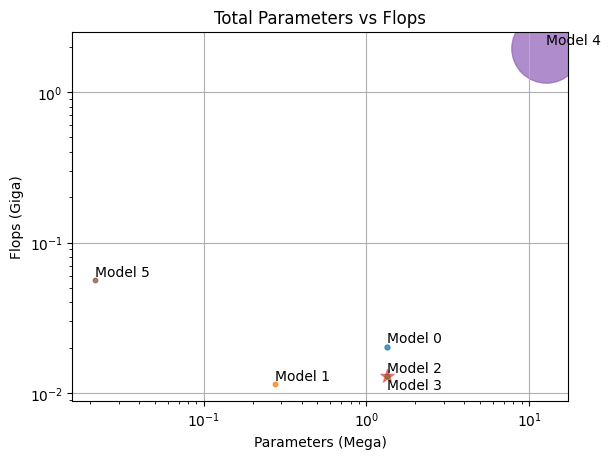

In [93]:
#plt.scatter(summary)
fig, ax = plt.subplots()
for i, O in enumerate(summary):
  #print(O)
  

  if i==3:
    plt.scatter(O[0], O[1], marker = '*', s= 100, alpha=0.5)
    ax.annotate(f'Model {i}', O, xycoords='data',
                xytext=(0, -9), textcoords='offset points')
  else:
    plt.scatter(O[0], O[1], s=float(O[0]*O[1])*100+10, alpha=0.75)
    ax.annotate(f'Model {i}', O, xycoords='data',
                xytext=(0, 3), textcoords='offset points')
plt.xscale('log')
plt.yscale('log')
plt.title('Total Parameters vs Flops')
plt.xlabel('Parameters (Mega)')
plt.ylabel('Flops (Giga)')
plt.grid()

**Observations**
Note that Model 2 and 3 are identical.  The model with the most parameters and highest number of floating pointer operations is Model 4 (VGG16).  Model 1 has the lowest number of floating-point operations and Model 5 has the lowest number of parameters.

We might consider how our GPU does floating-point operation and if there is a optimal datatype (float16?) for this model.  Typecasting has been noted to be 'expensive' in our former research and testing.

---
## <b>Model Training</b>
---

Below we see that some model trained more quickly (few epochs) than others, which the base-model taking the most epochs to train and VGG-model the least epochs. The base-model with batch normilization trained almost as quickly as the VGG-model.


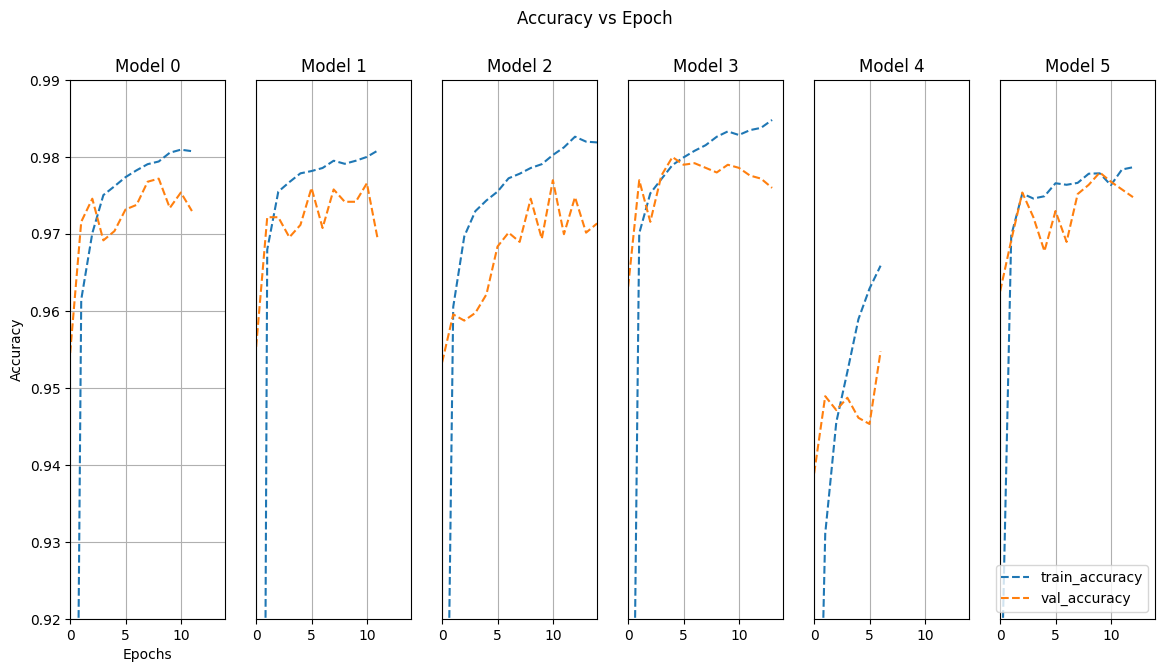

Recall our Models:
	Model 0: Three Convolution Layers with Dropout, Training Dataset: RGB
	Model 1: Four Convolution Layers with Dropout, Training Dataset: RGB
	Model 2: Three Convolution Layers with Dropout and first-layer batch normilization, Training Dataset: RGB
	Model 3: Three Convolution Layers with Dropout and first-layer batch normilization, Training Dataset: RGB (Augmented)
	Model 4: VGG16 Transfered at block3_pool Layer with two dense layers, Training Dataset: RGB
	Model 5: Autoencoder!!, Training Dataset: RGB


In [94]:
plt.figure(figsize = (14, 7))

for i,h in enumerate(histories):
  history = h
  plt.suptitle("Accuracy vs Epoch")
  plt.subplot(1,len(histories),i+1)
  N = len(history["accuracy"])
  plt.ylim((0.92,.99))
  plt.xlim((0,14))
  plt.plot(np.arange(0, N), history["accuracy"], label = "train_accuracy", ls = '--')
  plt.plot(np.arange(0, N), history["val_accuracy"], label = "val_accuracy", ls = '--')
  plt.title(f'Model {i}')
  plt.grid(True)
  if i==0:
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
  else:
    plt.yticks([])
        
plt.legend(loc="lower right");
plt.show()

print('Recall our Models:')
for n in notes:
  print(f'\t{n}')

In [95]:
def plot_confusion_matrix(model, images):
  pred = model.predict(images)  
  pred = np.argmax(pred, axis = 1) 
  y_true = np.argmax(test_labels, axis = 1)

  # Printing the classification report
  print(classification_report(y_true, pred, digits=4))

  # Plotting the heatmap using confusion matrix
  cm = confusion_matrix(y_true, pred)
  plt.figure(figsize = (8, 5))
  sns.heatmap(cm, annot = True,  fmt = '.0f', 
              xticklabels = ['Uninfected', 'Parasitized'],
              yticklabels = ['Uninfected', 'Parasitized'])
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

---
## <b>Model Evaluation</b>
---

Our model are evaluated on precision, recall, and f1-score, as well as, miniminzing the false-negatives (Missclassified infected cells).  



In [96]:
# Use our models to make our predictions
Y = np.argmax(test_labels, axis = 1)
Y_hat = []
for model in models:
  y = model.predict(my_test_images)  
  Y_hat.append(np.argmax(y, axis = 1))

82/82 [==============================] - 2s 18ms/step


In [97]:
# Evaluate our models based on precision, recall, and f1-score
f1 = []
for i,model in enumerate(models):
  print()
  print('='*50)
  print(notes[i])
  print('='*50)
  S = classification_report(Y, Y_hat[i], digits=4)
  g = re.search(r'weighted avg\s*(0.\d*)\s*(0.\d*)\s*(0.\d*)', S)
  if g:
    #print(g.group(1), g.group(2),g.group(3))
    f1.append(float(g.group(3)))
  print(S)


Model 0: Three Convolution Layers with Dropout, Training Dataset: RGB
              precision    recall  f1-score   support

           0     0.9720    0.9885    0.9802      1300
           1     0.9883    0.9715    0.9798      1300

    accuracy                         0.9800      2600
   macro avg     0.9801    0.9800    0.9800      2600
weighted avg     0.9801    0.9800    0.9800      2600


Model 1: Four Convolution Layers with Dropout, Training Dataset: RGB
              precision    recall  f1-score   support

           0     0.9714    0.9923    0.9817      1300
           1     0.9921    0.9708    0.9813      1300

    accuracy                         0.9815      2600
   macro avg     0.9818    0.9815    0.9815      2600
weighted avg     0.9818    0.9815    0.9815      2600


Model 2: Three Convolution Layers with Dropout and first-layer batch normilization, Training Dataset: RGB
              precision    recall  f1-score   support

           0     0.9698    0.9892    0.9794

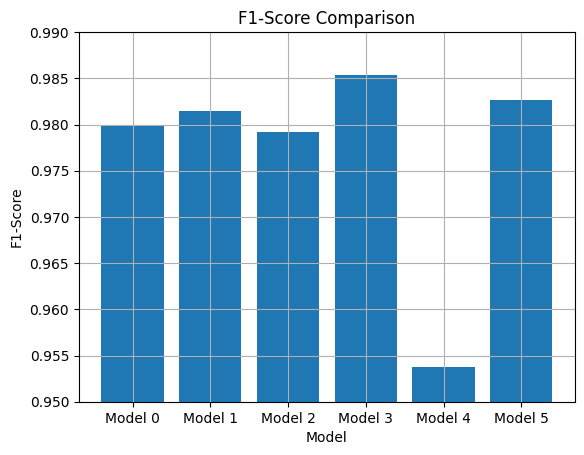

In [98]:
# Compare f1-scores
labels = [f'Model {i}' for i in range(len(f1))]
plt.bar(labels,f1)
plt.ylim(0.95,.99)
plt.title('F1-Score Comparison')
plt.ylabel('F1-Score')
plt.xlabel('Model')
plt.grid()

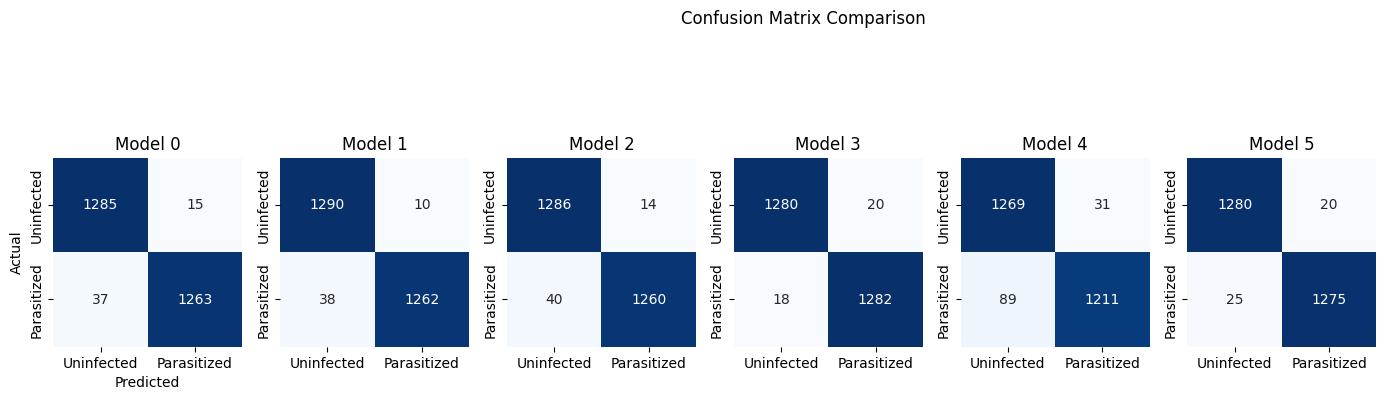

Recall our Models:
	Model 0: Three Convolution Layers with Dropout, Training Dataset: RGB
	Model 1: Four Convolution Layers with Dropout, Training Dataset: RGB
	Model 2: Three Convolution Layers with Dropout and first-layer batch normilization, Training Dataset: RGB
	Model 3: Three Convolution Layers with Dropout and first-layer batch normilization, Training Dataset: RGB (Augmented)
	Model 4: VGG16 Transfered at block3_pool Layer with two dense layers, Training Dataset: RGB
	Model 5: Autoencoder!!, Training Dataset: RGB


In [99]:
# Visually compare our models based using a confusion matrix
plt.figure(figsize = (20, 5))
plt.suptitle("Confusion Matrix Comparison")

for i in range(len(models)):
  cm = confusion_matrix(Y, Y_hat[i])
  ax = plt.subplot(1,len(models)+1,i+1)
  ax.set_box_aspect(1)
  sns.heatmap(cm, annot = True,  fmt = '.0f', cbar=False, cmap='Blues',
              xticklabels = ['Uninfected', 'Parasitized'],
              yticklabels = ['Uninfected', 'Parasitized'])
  if i==0:
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
  plt.title(f'Model {i}')
plt.show();

print('Recall our Models:')
for n in notes:
  print(f'\t{n}')

---
## <b> Model Comparison Summary</b>
---

* All models performed slightly poorer with the standarized HSV dataset.  
* Model 5 performed best on both the RGB and HSV standardized datasets with Model 1 a close second.
* Model 3 was the second best performing model but only slightly better than Model 0
* Model 3 and Model 2 are identical with the only difference being that Model 3 was trained with data augmentation.
* Model 3 performed worst with a large the number (>1x) augmented images set.  This was likely due to over-fitting.  After in memory unzipping the max testible augmention was 0.5 times the train dataset size, due to RAM limitation. 
* Model 2 perform slight better using ReLU over LeakyReLU.
* Model 4 was the poorest performing model of all models.

Note: There is some variablity between runs depending on the randoms seeds.  This comparisons is based on several runs.  Models 0, 1, and 3 all performed well.  Model 5 consistently show the best performace.

---
## **Suggested Improvements**
---

<i>"It is good for a professional to be reminded that his professionalism is only a husk, that the real person must remain an amateur, a lover of the work."

--May Sarton </i>

**Areas for development:**

* Data Preprocessing
  * We noted that these images were likely prepared by a SNN (Segmentation Neural Network) which provided cropping and masking of individual RBCs. The images are tightly cropped. We might consider adding a slightly larger black background to avoid our model training on the boarder. (Done. This helped to remove artifacts in augmented images.)
  * We trained on Hue Standardized images and this showed promise.  The method employed was based on the single color mean hue of all images.  A whole matrix color mean might help to avoid model training on the boarder as well.
  * Might consider converting our image into a multi-spectral format using a 2D wavelet transform.  This could reduce the learning epochs and reduce model complexity. (We tried this. It didn't help)

* Model 
  * We explored simplifing our network down to as few a layers and neurons as possible. This shows promise for a model that can quickly train and predict on low compute edge devices. This is an area for further study. (Done. Model 5 is the result of this tuning.)
  * We explored our Graph with tensorboard to find potential areas of optimization.  This is also an area for further study.
  * Maria Delgado-Ortet[5], et al, proposes a CNN model to classify Plasmodium infected cell.  We might reproduce this model and compare ther results. Note: 181 x 181 images where used. (Done. This turned out to be a rather poor model.)
  * There are various types of malaria it might be of value to build a model that can classify these into groups.  This might given some insight into the nature and degree of infection.
  * We see value adding a Batch Normalzation to the model, particularly during addtive training.  We might consider this if new dataset as made available.

* Methodology
  * There is some variablity between runs depending on the randoms seeds.  Ideally multiple runs would be collected for comparison.  Unfortunately our computing resourses were limited so only a single run was provided for comparision.  We did however develop a model testing framework that can easily be exdended, limited only by time and disk space. (Added logging to capture model fitting results.)



---
# **Model and Data Proposal**
---

* Model
  * Based our model evaluation, we suggest implementing the Model 5 at this time. 
  * Model 5 performed the best overall with the highest precision, recall, and f1 scores and the lowest false-negatives in the confusion matrix.
  * The f1-score was used to examine the balance between precision and recall.
  * The confusion-matrix was examined for the lowest false-negatives, thus fewest infected slipped pass detection.  

* Data
  * We suggest no image preprocessing other than scaling. This may simply later additive training. 
  * Data augmentation was used to balance the initial training set.  This was choosen base on limited dataset size.
  * Subsuquent batch training ought to drop samples for a balance distribution.  

Note: 

There was some variablity between runs depending on the randoms seeds. This comparison is based on multple runs, for which Models 0, 1, 3 and 5 all performed well.  Model 5 consistently shown the best performace.

## **Model 5 Architecture**
Use libraries to visuallize model.

In [100]:
!pip install visualkeras &> /dev/null

In [101]:
#from keras.utils.vis_utils import plot_model
#plot_model(models[5], to_file=f'{path}/model_5_plot.png', show_shapes=True, show_layer_names=True)

Model 5


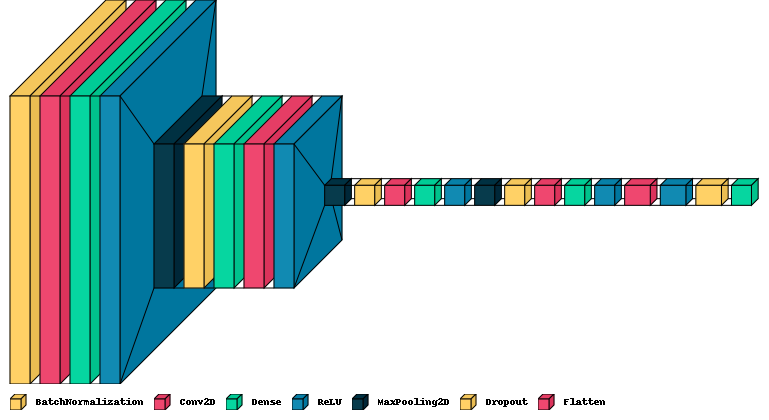

In [102]:

#show our best model
import visualkeras

i=5
print('='*50)
print(f'Model {i}')
print('='*50)
visualkeras.layered_view(models[i], legend=True)


Model 1


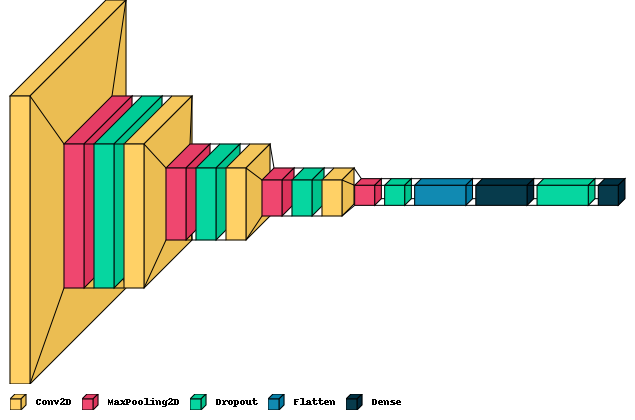

In [103]:
# Compare with next best model

i=1
print('='*50)
print(f'Model {i}')
print('='*50)
visualkeras.layered_view(models[i], legend=True)

## **Model 5 Out-of-core**
Let's explore how our selected model might improve with Out-of-core learning.

<i> "We are as Gods... So we might as well get good at it."
--Stewart Brand


In [104]:
model = models[5]

history = model.fit(new_images, 
                  new_labels,
                  batch_size = 32,
                  callbacks = callbacks,
                  validation_data=(my_validation_images, validation_labels),
                  epochs = 20,
                  verbose = 1)

history = history.history

Epoch 1/20
314/314 [==============================] - 21s 40ms/step - loss: 0.0682 - accuracy: 0.9791 - val_loss: 0.0680 - val_accuracy: 0.9766
Epoch 2/20
314/314 [==============================] - 11s 34ms/step - loss: 0.0664 - accuracy: 0.9775 - val_loss: 0.0678 - val_accuracy: 0.9747
Epoch 3/20
314/314 [==============================] - 6s 20ms/step - loss: 0.0678 - accuracy: 0.9777 - val_loss: 0.0705 - val_accuracy: 0.9752
Epoch 4/20
314/314 [==============================] - 7s 21ms/step - loss: 0.0658 - accuracy: 0.9763 - val_loss: 0.0687 - val_accuracy: 0.9743
Epoch 5/20
314/314 [==============================] - 6s 19ms/step - loss: 0.0645 - accuracy: 0.9791 - val_loss: 0.0656 - val_accuracy: 0.9754
Epoch 6/20
314/314 [==============================] - 8s 25ms/step - loss: 0.0662 - accuracy: 0.9780 - val_loss: 0.0679 - val_accuracy: 0.9739
Epoch 7/20
314/314 [==============================] - 6s 20ms/step - loss: 0.0669 - accuracy: 0.9758 - val_loss: 0.0632 - val_accuracy: 0.97

82/82 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0     0.9757    0.9869    0.9813      1300
           1     0.9868    0.9754    0.9810      1300

    accuracy                         0.9812      2600
   macro avg     0.9812    0.9812    0.9812      2600
weighted avg     0.9812    0.9812    0.9812      2600



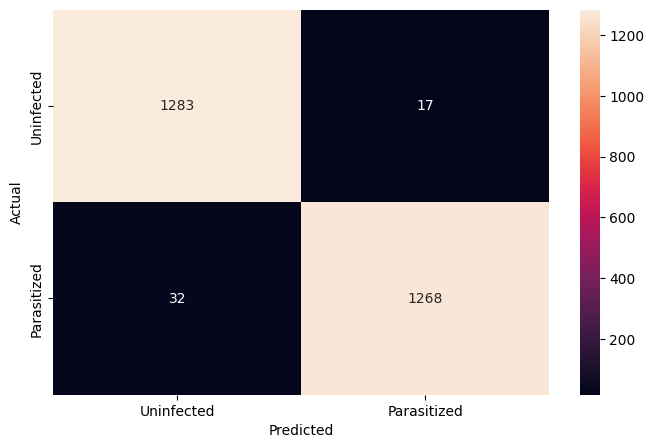

0.14999999999999458

In [105]:
plot_confusion_matrix(model, my_test_images)
(0.9842-0.9827)*100

## **Observations and insights**
Training with augmented data shows that this model will performance can improve as additional training data is provided.

---
# **Appendix 0. Resources**
---

**Background Resourses:**

[0] Poostchi, Mahdieh et al. “Image analysis and machine learning for detecting malaria.” Translational Research 194 (2018): 36–55.

[1] Andrade, M.V., Noronha, K., Diniz, B.P.C. et al. The economic burden of malaria: a systematic review. Malar J 21, 283 (2022). https://doi.org/10.1186/s12936-022-04303-6

[2] https://en.wikipedia.org/wiki/Malaria

[3] Sarkar PK, Ahluwalia G, Vijayan VK, Talwar A. Critical Care Aspects of Malaria. Journal of Intensive Care Medicine. 2010;25(2):93-103. doi:10.1177/0885066609356052

[4] "5.1 Diagnosing Malaria (2015)". WHO Guidelines for Malaria. World Health Organization. 14 March 2023

[5] Delgado-Ortet M, Molina A, Alférez S, Rodellar J, Merino A. A Deep Learning Approach for Segmentation of Red Blood Cell Images and Malaria Detection. Entropy (Basel). 2020 Jun 13;22(6):657. doi: 10.3390/e22060657. PMID: 33286429; PMCID: PMC7517

[6] Brunton, S., & Kutz, J. (2019). Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control. Cambridge: Cambridge University Press. doi:10.1017/9781108380690

[7] Provenzi, E. Geometry of color perception. Part 1: structures and metrics of a homogeneous color space. J. Math. Neurosc. 10, 7 (2020). https://doi.org/10.1186/s13408-020-00084-x


**Other Web Resourses:**

<https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html>

<https://www.hindawi.com/journals/jece/2017/7948571/>

<https://wiki.seg.org/wiki/Spectral_decomposition>

<https://wires.onlinelibrary.wiley.com/doi/full/10.1002/widm.1474>

<https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7517192/>

<https://en.wikipedia.org/wiki/Precision_and_recall>

<https://docs.celly.ai/supported-tests/malaria-thick-blood-film>

<https://docs.celly.ai/supported-tests/malaria-thin-blood-film>

---
# <b> Appendix 1. Capstone Milestone Checklist <font color=green>$\checkmark$</font></b>
---

* Problem Definition: 
	* The context <font color=green>$\checkmark$</font>
		- Why is this problem important to solve? (<font color=blue>see: Abstract</font>)
	* The objectives <font color=green>$\checkmark$</font>
		- What is the intended goal? (<font color=blue>see: Objective and Dataset</font>)
	* The key questions <font color=green>$\checkmark$</font>
		- What are the key questions that need to be answered? (<font color=blue>see: Key Questions</font>)
	* The problem formulation <font color=green>$\checkmark$</font>
		- What is that we are trying to solve using data science? (<font color=blue>see: Objective and Dataset</font>)
	
* Data Exploration:
	* Data Description <font color=green>$\checkmark$</font>
		- What is the background of this data? What does it contain? (<font color=blue>see: EDA</font>)
	* Observations & Insights <font color=green>$\checkmark$</font>
		- What are some key patterns in the data?  (<font color=blue>see: EDA</font>)
		- What does it mean for the problem formulation? (<font color=blue>see: EDA</font>)
		- Are there any data treatments or preprocessed required? (<font color=blue>see: EDA</font>)
	
* Refined Insights:
	* Dataset <font color=green>$\checkmark$</font>
		- Behavior of CNN model on image data (<font color=blue>see: Image Conversion</font>)
		- Dataset is perfectly balanced between two categories. (<font color=blue>see: Model Building->Prepare Dataset and Model 3:->Data Augmentation</font>)
	* Model <font color=green>$\checkmark$</font>
		- Does Image data augmentation help or does not help to improve the model accuracy? (<font color=blue>see: Model 3 and Model Comparison->Model Comparison Summary</font>)
		- Use transfer learning to check the performance and evaluate the model. What are the results? (<font color=blue>see: Model 4 and Model Comparison</font>)
	
* Comparison of various techniques and their relative performance:
	* Performance <font color=green>$\checkmark$</font>
		- Compare the performance of all the models (<font color=blue>see: Model Comparison</font>)
		- Use confusion matrix and plotted the various metrics (<font color=blue>see: Model Comparison</font>)
		- Use classification report to show precision and recall (<font color=blue>see: Model Comparison</font>)
		- If there is a scope to improve the performance further? If yes, how? (<font color=blue>see: Model Comparison->Suggested Improvements</font>)
	
* Proposal for the final solution design:
	* Reason for choosing the final model (<font color=blue>see: Model and Data Proposal</font>) <font color=green>$\checkmark$</font>
	* Intuition behind why the final architecture is performing better (<font color=blue>see: Model and Data Proposal</font>) <font color=green>$\checkmark$</font>

---
# <b> Appendix 2. Final Submission Checklist <font color=green>$\checkmark$</font></b>
---

(<font color=blue>see: Appendix 3: Core Summary</font>)

* Executive summary: <font color=green>$\checkmark$</font></b>
	- What are the most important findings from the analysis done in Milestone
	- Provide the final proposed model specifications
		
* Problem and solution summary <font color=green>$\checkmark$</font></b>
	- Summary of the problem
	- Explain the reason for the proposed solution design
	- How it would affect the problem/business?
	
* Recommendations for implementation <font color=green>$\checkmark$</font></b>
	- What are some key recommendations to implement the solutions?
	- What are the key actionables for stakeholders?
	- What is the expected benefit and/or costs?
	- What are the key risks and challenges?
	- What further analysis needs to be done or what other associated problems need to be solved?

---
# **Appendix 3: Core Summary**
---

---
## **Executive Summary**
---

Several models of varying layer complexity were compared.  We found that model performance wasn’t necessarily a function of complexity.  We also discovered that we could extract certain layers with image processing.  While image processing could reduce training and model complexity, this also removed latent variables that might have been made available to the model.  Image processing was kept to a minimum.

It was ascertained that certain specific image process was however valuable.  Image rescaling helped to reduce input layer complexity.  The addition of a small border improved data augmentation by removing artifacts due to zooming pixels on the edge of the image.

The proposed model maximizes accuracy yet balances complexity, memory usage, and execution time.  The optimal model was discovered empirically by extracting layers and making informed assumptions[7] about the distributions of latent variables.  A base CNN (Convolution Neural Network) model was adapted into the simplest possible AE (Auto-Encoder)[6] model then layers were augmented to maximize accuracy and precision.  Model iterations were compared based on f1-scores.  

<center><img src='https://drive.google.com/uc?export=view&id=1uENY6J18941avviGBFYwnfXGVkNDEZJX' width=500px></center>

##### **Figure: Neural network architectures, Adapted from Brunton/Kutz[6], Figure 6.18.**

The final model is best described as a DCNN (Deep Convolution Neural Network) however is referred to as ‘Model 5: Autoencoder!!’ in the code, due to the enormous 10-fold decrease in parameters and the initial success of the model.  The model architecture consists of 4 main layers and 4 hidden cell layers. 

<center><img src='https://drive.google.com/uc?export=view&id=1eb6dWc7L0RYNT5pcnRh-4u72z3Pfrv-u' width=500px></center>

##### **Figure: Model Architecture**

The input layer utilizes batch-normalization to address batch variation and improve future out-of-core training.  In this input layer we also perform a convolution over the entire image, replicating the results of 2D wavelet image experiments.  The second main layer down-samples from the dense input using max pooling.  The third main layer again down-samples and acts as the bottleneck feature of the model.  The fourth main layer consists of a classification network and model output.

See: Model and Data Proposal->Model 5 Architecture

See also:

[6] Brunton, S., & Kutz, J. (2019). Data-Driven Science and Engineering

[7] Provenzi, E. Geometry of color perception. Part 1: structures and metrics of a homogeneous color space. J. Math. Neurosc. 10, 7 (2020). https://doi.org/10.1186/s13408-020-00084-x



## **Problem and Solution Summary**
The objective for this project was to build an accurate and efficient machine vision model that can improve the detection rate of a laboratory technician. A model was developed to identify whether or not a red blood cell in an image is infected with Malaria. 

A CNN model was chosen based on the nature of the dataset--color images. Consideration was given to how additional training data could be used to build an additive model and how the addition of images might cause an imbalance in the loss function.  

We minimized image processing to assure hidden features are available for hyper-tuning. Images are resized to reduce model complexity and a border added to improve data augmentation.  Color Space transformations were evaluated and found to be isomorphic thus no further image processing was deemed necessary. 

Reducing image processing helps to reduce overhead during file importing and improves out-of-core training.  By normalization per additional training batch, we minimize side-effects due to changes in workflow and variations in lighting or evolving imaging technologies.

---
## **Recommendations for Implementation**
---

The model’s performance is exceptional and it features the ability to save and load the architecture/weights and will ease the deployment of the model.  Additional software features such as web portal to upload images and retrieve results would need to be developed or adapted.  Server daemons to manage, process and present images to the inference model will also be required.  A portal interface for data curation and out-of-core training might also be considered.

<center><img src='https://drive.google.com/uc?export=view&id=1e0U5FPrAD84J5vlPVLz3m429ZumdJl_a' width=500px></center>

##### **Figure: CDSS (Clinical Descision Support System)**

This model does not stand-alone--it is an integrated part of a Clinical Decision Support System.  Here we see the key stakeholders and show how they each interact with the machine learning model.  The diagram above also shows where the data and decisions reside.

The key befits of this model and system architecture ought be evident by now.  For the laboratory technician we improve their ability and speed to process samples. We provide accurate prediction to the physician to aid their treatment decision.  We enable an expert collaborator to curate and encode data for out-of-core learning.  Finally we provide model to machine learning operations that is easy to deploy, maintain, and grows with changing technologies.

We already detailed remaining challenges for deployment, namely, customer/expert portals and supporting server daemons.  Other challenges such as containerization for cloud deployment remain.  While out of scope for this project we’ve attempted to identify these areas as we transition from development to deployment.

In [106]:
#assertEnd()
logging.shutdown() # Only logs for complete runs will be saved.